In [1]:
%matplotlib inline

import os
import h5py
import numpy as np
from matplotlib import pyplot as plt


The fastMRI dataset is distributed as a set of HDF5 files and can be read with the h5py package. Here, we show how to open a file from the multi-coil dataset. Each file corresponds to one MRI scan and contains the k-space data, ground truth and some meta data related to the scan.

In [2]:
download_path = '/DATASERVER/MIC/SHARED/NYU_FastMRI/Preprocessed/'
train_path = os.path.join(download_path,'multicoil_train')
validation_path = os.path.join(download_path,'multicoil_val')
test_path = os.path.join(download_path,'multicoil_test')
fully_sampled_test_path = os.path.join(download_path,'multicoil_test_full')


## Check mri_data.py changes

In [ ]:
from pathlib import Path
import torch

root = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Preprocessed_CS/'
files = list(Path(root).iterdir())
for fname in sorted(files):
    print(fname)
    print(fname.stem)
    break

bart_file = np.load(fname)
print(bart_file.shape)
cs_data = bart_file[0]
print(cs_data.shape)

rss_dir = '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Full_RSS_target/'
print(fname.stem)
rss_filename = fname.stem.replace('_cs', '_rss') + '.pt'
print(rss_filename)
rss_file = torch.load(rss_dir + rss_filename)['image'][0].numpy()
print(rss_file.shape)



/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/Preprocessed_CS/file1000001_cs.npy
file1000001_cs
(36, 640, 640)
(640, 640)
file1000001_cs
file1000001_rss.pt
(640, 640)


## CHECK IF KNEE CS RECONSTRUCTIONS LOOK OK!

Shape of the data: (38, 640, 640)
Data type: complex64
Shape of the data: (640, 640)


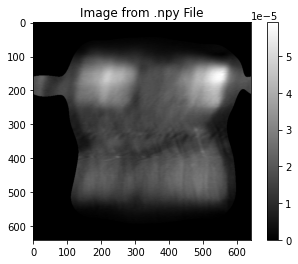

In [ ]:

path = "/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/knee_train"

# Select a file and save in hf
file_name = 'file1000059_cs.npy'
data = np.load(os.path.join(path, file_name), 'r')

# Print the shape and data type of the array
print("Shape of the data:", data.shape)
print("Data type:", data.dtype)

data_slice1 = data[36,:,:]
print("Shape of the data:", data_slice1.shape)

# Assuming 'data' is a 2D array (image)
plt.imshow(np.abs(data_slice1), cmap='gray')  # Use 'gray' for grayscale images
plt.colorbar()  # Add a color bar to show the scale
plt.title('Image from .npy File')
plt.show()

## Original PREPROCESSING

Look at keys and attributes of files in training data/ validation data / test data

(only test data that is not fully sampled has "acceleration" as attrs and a "mask" in keys)

In [57]:
file_name = 'file_brain_AXFLAIR_200_6002425.h5'
hf = h5py.File(os.path.join(train_path, file_name), 'r')


In [62]:
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))
print('shape:', hf['kspace'].shape)
print('Shape:', hf['cs_data'].shape)


Keys: ['cs_data', 'grappa_data', 'ismrmrd_header', 'kspace', 'reconstruction_rss', 'sense_data']
Attrs: {'acquisition': 'AXFLAIR', 'max': 0.0004274357358916608, 'norm': 0.09131797120370877, 'patient_id': 'dcfc3e70496246a709dab23831262b60589f4383d6e05bf5559731ea8d80bb1f'}
shape: (16, 20, 640, 320)
Shape: (16, 640, 320)


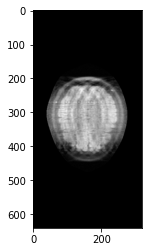

In [63]:
import matplotlib.pyplot as plt
slice6 = hf['cs_data'][6,:,:]
plt.imshow(np.abs(slice6), cmap='gray')  # Use 'gray' for grayscale images

In [45]:
file_name = 'file_brain_AXFLAIR_200_6002447.h5'
hf = h5py.File(os.path.join(validation_path, file_name), 'r')


In [6]:
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))


Keys: ['cs_data', 'grappa_data', 'ismrmrd_header', 'kspace', 'reconstruction_rss', 'sense_data']
Attrs: {'acquisition': 'AXFLAIR', 'max': 0.00041413615952341293, 'norm': 0.08723472457184536, 'patient_id': '30c14259008242f60e5214a793bad574fbf48a7140f76ec3152eef31e090486d'}


In [7]:
file_name = 'file_brain_AXFLAIR_200_6002441.h5'
hf = h5py.File(os.path.join(test_path, file_name), 'r')


In [8]:
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))


Keys: ['cs_data', 'grappa_data', 'ismrmrd_header', 'kspace', 'mask', 'sense_data']
Attrs: {'acceleration': 8, 'acquisition': 'AXFLAIR', 'num_low_frequency': 13, 'patient_id': 'ca18fce12f2549e69a2db3c660a4d27b116cd79c6ee2437a15db40db7379c723'}


In [5]:
file_name = 'file_brain_AXFLAIR_200_6002441.h5'
hf = h5py.File(os.path.join(fully_sampled_test_path, file_name), 'r')


In [10]:
print('Keys:', list(hf.keys()))
print('Attrs:', dict(hf.attrs))


Keys: ['ismrmrd_header', 'kspace', 'reconstruction_rss']
Attrs: {'acquisition': 'AXFLAIR', 'max': 0.0003919748921278401, 'norm': 0.08606309877132198, 'patient_id': '6002441'}


Get CS mask data

In [7]:
# Real-life CS mask data
import scipy.io as sio
mat_file = sio.loadmat('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/fastMRI-hybrid-modelling/fastMRI/sampling_profiles_CS.mat')
mat_file.keys()


dict_keys(['__header__', '__version__', '__globals__', 'm256_CS1_mask', 'm256_CS2_mask', 'm256_CS4_mask', 'm256_CS6_mask', 'm256_CS8_mask', 'm256_full_mask', 'm320_CS1_mask', 'm320_CS2_mask', 'm320_CS4_mask', 'm320_CS6_mask', 'm320_CS8_mask', 'm320_full_mask'])

Here, we can test our preprocessing approach for training and validation data

In [ ]:
#file_name = 'file_brain_AXFLAIR_200_6002425.h5'
preprocessed_train_path = '/DATASERVER/MIC/SHARED/NYU_FastMRI/Preprocessed/multicoil_train'
hf = h5py.File(os.path.join(preprocessed_train_path, file_name), 'r') # Opens in append mode! 'a' instead of 'r'
# CANT WRITE TO FILES OF NYU DATASET, HAVE TO STORE RESULTS YOURSELF


OSError: Unable to create file (unable to open file: name = '/DATASERVER/MIC/SHARED/NYU_FastMRI/Preprocessed/multicoil_train/file_brain_AXFLAIR_200_6002447.h5', errno = 13, error message = 'Permission denied', flags = 15, o_flags = c2)

In [11]:
from fastmri.data import transforms as T

kspace = hf['kspace'][()]
print("Shape of the raw kspace: ", str(np.shape(kspace)))
print("Datatype of the raw kspace: ", str(type(kspace)))


Shape of the raw kspace:  (16, 16, 640, 320)
Datatype of the raw kspace:  <class 'numpy.ndarray'>


In [12]:
# First, we need to create 2 masked versions of k-space:
#   - We need to estimate our sensitivity maps as if we have undersampled data with an ACS region (using ESPIRiT)
#   - We need an actual CS undersampling pattern for the actual reconstruction pipeline itself

## Create ACS masked space for S_i
from fastmri.data.subsample import EquispacedMaskFunc

def apply_mask(slice_kspace, mask_func):
    ''' 
    Args:
        slice_kspace (numpy.array)
        mask_func (class)
    Returns:
        masked_kspace (numpy.array)
        mask (torch.tensor)
    '''
    slice_kspace_T = T.to_tensor(slice_kspace)
    masked_kspace_T, mask = T.apply_mask(slice_kspace_T, mask_func)
    masked_kspace = T.tensor_to_complex_np(masked_kspace_T)
    return masked_kspace, mask

mask_func = EquispacedMaskFunc(center_fractions=[0.08], accelerations=[4])
masked_kspace_ACS, mask_ACS = apply_mask(kspace, mask_func) # For validation data we should pass a seed though!


In [13]:
print("Shape of the generated mask: ", str(mask_ACS.shape))
print("Datatype of the generated mask: ", str(type(mask_ACS)))


Shape of the generated mask:  torch.Size([1, 1, 1, 320, 1])
Datatype of the generated mask:  <class 'torch.Tensor'>


In [14]:
## create real world CS undersampling 

def closer_to_4_or_8(float):
    diff_4 = np.abs(float - 4)
    diff_8 = np.abs(float - 8)

    if diff_4 < diff_8:
        return int(4)
    elif diff_8 < diff_4:
        return int(8)

def generate_array(shape, R, mat_file, tensor_out):
    if R == 4:
        array = mat_file['m320_CS4_mask'].squeeze()
    elif R == 8:
        array = mat_file['m320_CS8_mask'].squeeze()
    else:
        raise ValueError('Unrecognized acceleration factor specified. Must be 4 or 8.')
    # Calculate padding needed to reach the desired length
    desired_length = shape[-1]
    padding_needed = desired_length - len(array)
    if padding_needed > 0:
        # Calculate padding width for symmetric padding
        padding_width = (padding_needed // 2, padding_needed - padding_needed // 2)
        # Pad the array symmetrically
        array = np.pad(array, padding_width, mode='symmetric')
    elif padding_needed < 0:
        # Calculate trimming indices for symmetric trimming
        trim_start = -padding_needed // 2
        trim_end = len(array) + padding_needed // 2
        # Trim the array symmetrically
        array = array[trim_start:trim_end]
    # Make array compatible with fastmri mask function class
    for i in range(len(shape)-1):
        array = np.expand_dims(array, 0)
    if tensor_out:
        array = T.to_tensor(array)
    return array

mask = generate_array(kspace.shape, 4, mat_file, tensor_out=False)
masked_kspace = kspace * mask + 0.0


In [15]:
print("Shape of the generated mask: ", str(mask.shape))
print("Datatype of the generated mask: ", str(type(mask)))


Shape of the generated mask:  (1, 1, 1, 320)
Datatype of the generated mask:  <class 'numpy.ndarray'>


In [16]:
# Now, let's preform a slice-wise ESPIRiT and CS estimation (TAKES LONG CAUSE IS FOR ALL SLICES!!)

import bart

def estimate_sensitivity_maps(kspace):
    ''' 
    Args:
        kspace (numpy.array): slice kspace of shape (num_coils, rows, cols)
    Returns:
        S (numpy.array): Estimated sensitivity maps given by ESPIRiT of shape (num_coils, rows, cols)
    '''
    # Move coil axis to the back as expected by BART
    kspace_perm = np.moveaxis(kspace, 0, 2)
    # Add extra dimension, because the ESPIRiT method expects a 4D input array where the third dimension represents the batch size.
    kspace_perm = np.expand_dims(kspace_perm, axis=2)
    # Estimate sensitivity maps with ESPIRiT method
    S = bart.bart(1, "ecalib -d0 -m1", kspace_perm)
    # Undo the previous operations to get the original data structure back
    S = np.moveaxis(S.squeeze(), 2, 0)
    return S

def CS(kspace, S, lamda=0.005, num_iter=50):
    ''' 
    Performs CS reconstruction
    https://mrirecon.github.io/bart/

    Args:
        kspace (numpy.array): Slice kspace of shape (num_coils, rows, cols)
        S (numpy.array): Estimated sensitivity maps given by ESPIRiT of shape (num_coils, rows, cols)
        lamda: Value of the hyperparameter / regularizer of the l1 norm term
        num_iter: The amount of iterations the algorithm can run
    Returns:
        reconstruction (numpy.array): Estimated CS reconstruction of shape (rows, cols))
    '''
    # Move coil axis to the back as expected by BART
    kspace_perm = np.moveaxis(kspace, 0, 2)
    S_perm = np.moveaxis(S, 0, 2)
    # Add extra dimension, because BART expects a 4D input array where the third dimension represents the batch size.
    kspace_perm = np.expand_dims(kspace_perm, axis=2)
    S_perm = np.expand_dims(S_perm, axis=2)
    # Perform CS
    reconstruction = bart.bart(1, 'pics -S -l1 -r {} -i {}'.format(lamda, num_iter), kspace_perm, S_perm)
    return reconstruction

cs_data = np.zeros((kspace.shape[0], kspace.shape[2], kspace.shape[3]), dtype=np.complex64)

for slice in range(kspace.shape[0]):
    S = estimate_sensitivity_maps(masked_kspace_ACS[slice,:,:,:])   # with ACS region!
    cs_data[slice,:,:] = CS(masked_kspace[slice,:,:,:], S)          # with real life CS_kspace

print("Shape of the numpy-converted CS data: ", str(cs_data.shape))
print("Type of the numpy-converted CS data: ", str(type(cs_data)))


Shape of the numpy-converted CS data:  (16, 640, 320)
Type of the numpy-converted CS data:  <class 'numpy.ndarray'>


In [ ]:
plt.imshow(np.abs(cs_data[10,:,:]), cmap='gray')

## TEST ZERO-PADDING before/after BART:

Select a file

In [ ]:
# Select a file and save in hf
file_name = 'file_brain_AXFLAIR_200_6002425.h5'
hf = h5py.File(os.path.join(train_path, file_name), 'r')

How does it work for files of size (768, 396), where we cut the FE direction to 640??

file names to test:
file_brain_AXT2_209_2090111.h5

file_brain_AXT2_200_2000507.h5

file_brain_AXT2_200_6002445.h5

file_brain_AXT2_200_2000469.h5

file_brain_AXT2_201_2010349.h5

file_brain_AXT2_201_2010029.h5

file_brain_AXT2_210_2100332.h5

file_brain_AXT2_200_6002214.h5

file_brain_AXT2_210_6001756.h5


In [ ]:
file_name = "file_brain_AXT2_200_6002214.h5"
hf = h5py.File(os.path.join(train_path, file_name), 'r')



Get k-space + create masked_versions of k-space

In [ ]:
# Get k-space
from fastmri.data import transforms as T

kspace = hf['kspace'][()]
print("Shape of the raw kspace: ", str(np.shape(kspace)))
print("Datatype of the raw kspace: ", str(type(kspace)))

Shape of the raw kspace:  (16, 16, 768, 396)
Datatype of the raw kspace:  <class 'numpy.ndarray'>


Shape kspace = (number of slices, number of coils, height, width)

In [1]:
# First, we need to create 2 masked versions of k-space:
#   - We need to estimate our sensitivity maps as if we have undersampled data with an ACS region (using ESPIRiT)
#   - We need an actual CS undersampling pattern for the actual reconstruction pipeline itself

## Create ACS masked space for S_i
from fastmri.data.subsample import EquispacedMaskFunc

def apply_mask(slice_kspace, mask_func):
    ''' 
    Args:
        slice_kspace (numpy.array)
        mask_func (class)
    Returns:
        masked_kspace (numpy.array)
        mask (torch.tensor)
    '''
    slice_kspace_T = T.to_tensor(slice_kspace)
    masked_kspace_T, mask = T.apply_mask(slice_kspace_T, mask_func)
    masked_kspace = T.tensor_to_complex_np(masked_kspace_T)
    return masked_kspace, mask

mask_func = EquispacedMaskFunc(center_fractions=[0.08], accelerations=[4])
masked_kspace_ACS, mask_ACS = apply_mask(kspace, mask_func) # For validation data we should pass a seed though!

print("Shape of the generated mask: ", str(mask_ACS.shape))
print("Datatype of the generated mask: ", str(type(mask_ACS)))

NameError: name 'kspace' is not defined

In [46]:
## create real world CS undersampling 
# SELECT ACCELERATION FACTOR
R = 4

# get Real-life CS mask data
import scipy.io as sio
mat_file = sio.loadmat('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/fastMRI-hybrid-modelling/fastMRI/sampling_profiles_CS.mat')
mat_file.keys()

def closer_to_4_or_8(float):
    diff_4 = np.abs(float - 4)
    diff_8 = np.abs(float - 8)

    if diff_4 < diff_8:
        return int(4)
    elif diff_8 < diff_4:
        return int(8)

def generate_array(shape, R, mat_file, tensor_out):
    if R == 4:
        array = mat_file['m320_CS4_mask'].squeeze()
    elif R == 8:
        array = mat_file['m320_CS8_mask'].squeeze()
    else:
        raise ValueError('Unrecognized acceleration factor specified. Must be 4 or 8.')
    # Calculate padding needed to reach the desired length
    desired_length = shape[-1]
    padding_needed = desired_length - len(array)
    if padding_needed > 0:
        # Calculate padding width for symmetric padding
        padding_width = (padding_needed // 2, padding_needed - padding_needed // 2)
        # Pad the array symmetrically
        array = np.pad(array, padding_width, mode='symmetric')
    elif padding_needed < 0:
        # Calculate trimming indices for symmetric trimming
        trim_start = -padding_needed // 2
        trim_end = len(array) + padding_needed // 2
        # Trim the array symmetrically
        array = array[trim_start:trim_end]
    # Make array compatible with fastmri mask function class
    for i in range(len(shape)-1):
        array = np.expand_dims(array, 0)
    if tensor_out:
        array = T.to_tensor(array)
    return array

mask = generate_array(kspace.shape, R, mat_file, tensor_out=False)
masked_kspace = kspace * mask + 0.0

PERFORM BART reconstructions with zero-padded k-space (before and after )

Processing middle slice: 8
Method 1: Zero-padding k-space before BART
(16, 640, 640)
(16, 640, 640)
Method 1 execution time: 30.9188 seconds
Method 1 output shape: (640, 640)
Method 2: BART reconstruction first, then sinc interpolation
(1, 640, 640)
Method 2 execution time: 25.2013 seconds
Method 2 output shape: (640, 640)

Time comparison:
Method 1 (k-space zero-padding before BART): 30.9188 seconds
Method 2 (BART then sinc interpolation): 25.2013 seconds
Difference: 5.7175 seconds
Method 2 is faster
Mean absolute difference between methods: 2.780918475764338e-05
Max absolute difference between methods: 0.0006052551907487214


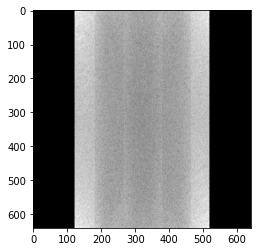

In [ ]:
import bart
import numpy as np
import time
import torch
from scipy.fft import ifft2, fft2

def estimate_sensitivity_maps(kspace):
    ''' 
    Args:
        kspace (numpy.array): slice kspace of shape (num_coils, rows, cols)
    Returns:
        S (numpy.array): Estimated sensitivity maps given by ESPIRiT of shape (num_coils, rows, cols)
    '''
    # Move coil axis to the back as expected by BART
    kspace_perm = np.moveaxis(kspace, 0, 2)
    # Add extra dimension, because the ESPIRiT method expects a 4D input array where the third dimension represents the batch size.
    kspace_perm = np.expand_dims(kspace_perm, axis=2)
    # Estimate sensitivity maps with ESPIRiT method
    S = bart.bart(1, "ecalib -d0 -m1", kspace_perm)
    # Undo the previous operations to get the original data structure back
    S = np.moveaxis(S.squeeze(), 2, 0)
    return S

def CS(kspace, S, lamda=0.005, num_iter=50):
    ''' 
    Performs CS reconstruction
    https://mrirecon.github.io/bart/

    Args:
        kspace (numpy.array): Slice kspace of shape (num_coils, rows, cols)
        S (numpy.array): Estimated sensitivity maps given by ESPIRiT of shape (num_coils, rows, cols)
        lamda: Value of the hyperparameter / regularizer of the l1 norm term
        num_iter: The amount of iterations the algorithm can run
    Returns:
        reconstruction (numpy.array): Estimated CS reconstruction of shape (rows, cols))
    '''
    # Move coil axis to the back as expected by BART
    kspace_perm = np.moveaxis(kspace, 0, 2)
    S_perm = np.moveaxis(S, 0, 2)
    # Add extra dimension, because BART expects a 4D input array where the third dimension represents the batch size.
    kspace_perm = np.expand_dims(kspace_perm, axis=2)
    S_perm = np.expand_dims(S_perm, axis=2)
    # Perform CS
    reconstruction = bart.bart(1, 'pics -S -l1 -r {} -i {}'.format(lamda, num_iter), kspace_perm, S_perm)
        # -S = rescale image after reconstrucition
        # -l1 = l1 wavelet (other option is l2 regularization)
        # -r lambda = regularization parameter
        # -i iter = max number of iterations
    return reconstruction

def zero_pad_kspace(kspace, target_size):
    """
    Zero-pad k-space to achieve sinc interpolation in image domain
    
    Args:
        kspace (numpy.array): K-space data (can be 2D or 3D with num_coils)
        target_size (tuple): Target size (rows, cols)
    
    Returns:
        kspace_padded (numpy.array): Zero-padded k-space
    """
    is_3d = len(kspace.shape) == 3  # Check if num_coils dimension exists
    if not is_3d:
        kspace = kspace[np.newaxis, ...]  # Add dummy coil dimension

    rows, cols = kspace.shape[-2], kspace.shape[-1]
    target_rows, target_cols = target_size

    # Convert k-space to fastMRI expected format (real, imag) -> shape (num_coils, rows, cols, 2)
    kspace_tensor = T.to_tensor(kspace)

     # Handle cropping if the size is too large
    if rows > target_rows and cols > target_cols:
        kspace_tensor = T.complex_center_crop(kspace_tensor, target_size)
        rows = target_rows
        cols = target_cols

     # if only 1 dimension is too large, crop that dimension   
    if rows > target_rows:
        kspace_tensor = T.complex_center_crop(kspace_tensor, (target_rows, cols))
        rows = target_rows
    
    if cols > target_cols:
        kspace_tensor = T.complex_center_crop(kspace_tensor, (rows, target_cols))
        cols = target_cols

    # Handle zero-padding if the size is too small
    if rows < target_rows or cols < target_cols:
        pad_rows = target_rows - rows
        pad_cols = target_cols - cols
        
        pad_top = pad_rows // 2
        pad_bottom = pad_rows - pad_top
        pad_left = pad_cols // 2
        pad_right = pad_cols - pad_left
        
        # Apply zero padding to 3D array
        kspace_tensor = torch.nn.functional.pad(
            kspace_tensor, (0, 0, pad_left, pad_right, pad_top, pad_bottom)
        )

    kspace_padded = T.tensor_to_complex_np(kspace_tensor)
    print(kspace_padded.shape)
    return kspace_padded if is_3d else kspace_padded[0]  # Remove dummy coil dimension if needed

def image_domain_zero_pad(image, target_size):
    """
    Perform sinc interpolation by IFT, zero-padding, FT
    
    Args:
        image (numpy.array): Image domain data (rows, cols)
        target_size (tuple): Target size (rows, cols)
    
    Returns:
        interpolated_image (numpy.array): Sinc interpolated image
    """
    # Convert to k-space
    kspace = fft2(image)
    
    # Zero-pad or crop k-space
    adjusted_kspace = zero_pad_kspace(kspace, target_size)

    #plt.imshow(padded_kspace, cmap='gray')
    plt.imshow(np.log(1e-7 + np.abs(adjusted_kspace)), cmap='gray')
    
    # Convert back to image domain
    interpolated_image = ifft2(adjusted_kspace)
    
    return interpolated_image

# Select the middle slice

print(f"Processing middle slice: {middle_slice_idx}")

# Target size for Unet compatibility (make sure it's divisible by 2^N where N is the depth of Unet)
target_size = (640, 640)  # Adjust as needed for your Unet architecture

# Method 1: Zero-padding k-space before BART
print("Method 1: Zero-padding k-space before BART")
start_time = time.time()

# Get the middle slice
middle_slice_kspace = masked_kspace[middle_slice_idx, :, :, :]
middle_slice_kspace_ACS = masked_kspace_ACS[middle_slice_idx, :, :, :]

# Zero-pad k-space
padded_kspace = zero_pad_kspace(middle_slice_kspace, target_size)
padded_kspace_ACS = zero_pad_kspace(middle_slice_kspace_ACS, target_size)

# Estimate sensitivity maps and perform CS
S_padded = estimate_sensitivity_maps(padded_kspace_ACS)
cs_result_method1 = CS(padded_kspace, S_padded)

method1_time = time.time() - start_time
print(f"Method 1 execution time: {method1_time:.4f} seconds")
print(f"Method 1 output shape: {cs_result_method1.shape}")

# Method 2: Perform BART reconstruction first, then do sinc interpolation in image domain
print("Method 2: BART reconstruction first, then sinc interpolation")
start_time = time.time()

# Estimate sensitivity maps and perform CS on original data
S_original = estimate_sensitivity_maps(middle_slice_kspace_ACS)
cs_result_original = CS(middle_slice_kspace, S_original)

# Perform sinc interpolation in image domain
cs_result_method2 = image_domain_zero_pad(cs_result_original, target_size)

method2_time = time.time() - start_time
print(f"Method 2 execution time: {method2_time:.4f} seconds")
print(f"Method 2 output shape: {cs_result_method2.shape}")

# Compare execution times
print("\nTime comparison:")
print(f"Method 1 (k-space zero-padding before BART): {method1_time:.4f} seconds")
print(f"Method 2 (BART then sinc interpolation): {method2_time:.4f} seconds")
print(f"Difference: {abs(method1_time - method2_time):.4f} seconds")
print(f"Method {'1' if method1_time < method2_time else '2'} is faster")

# Optionally, compute difference between the results to check if they're equivalent
diff = np.abs(cs_result_method1 - cs_result_method2)
print(f"Mean absolute difference between methods: {np.mean(diff)}")
print(f"Max absolute difference between methods: {np.max(diff)}")

In [48]:
# Method 3: Original reconstruction (no zero padding)
print("\nMethod 3: Original reconstruction (no zero padding)")
start_time = time.time()

# Get the middle slice (same as before)
middle_slice_kspace = masked_kspace[middle_slice_idx, :, :, :]
middle_slice_kspace_ACS = masked_kspace_ACS[middle_slice_idx, :, :, :]

# Estimate sensitivity maps and perform CS directly on original data
S_original = estimate_sensitivity_maps(middle_slice_kspace_ACS)
cs_result_method3 = CS(middle_slice_kspace, S_original)

method3_time = time.time() - start_time
print(f"Method 3 execution time: {method3_time:.4f} seconds")
print(f"Method 3 output shape: {cs_result_method3.shape}")


Method 3: Original reconstruction (no zero padding)


Method 3 execution time: 24.1427 seconds
Method 3 output shape: (768, 396)


In [49]:
# Compare execution times
print("\nTime comparison:")
print(f"Method 1 (k-space zero-padding before BART): {method1_time:.4f} seconds")
print(f"Method 2 (BART then sinc interpolation): {method2_time:.4f} seconds")
print(f"Method 3 (Original with no padding): {method3_time:.4f} seconds")

print(f"Method {'1' if method1_time < min(method2_time, method3_time) else ('2' if method2_time < method3_time else '3')} is fastest")


Time comparison:
Method 1 (k-space zero-padding before BART): 30.9188 seconds
Method 2 (BART then sinc interpolation): 25.2013 seconds
Method 3 (Original with no padding): 24.1427 seconds
Method 3 is fastest


FORGOT: still need to take AV + normalize before comparing (just like Mathijs did after cropping/zerofilling)

In [50]:
import torch
import fastmri
from fastmri.data import transforms as T


def preprocess_mri(image, clamp_range=(-6, 6), eps=1e-11):
    """
    Applies AV (absolute value for complex images) and normalizes an MRI image.
    
    Args:
        image (numpy.ndarray or tensor): Input image, possibly complex.
        clamp_range (tuple): Range for clamping values after normalization.
        eps (float): Small epsilon to prevent division by zero in normalization.
    
    Returns:
        (torch.Tensor: Processed image.)
        numpy.ndarray: processed image
    """
    # Convert to tensor if it's a numpy array
    if isinstance(image, np.ndarray):
        image = T.to_tensor(image)
    
    # Take absolute value (AV)
    image = fastmri.complex_abs(image)
    
    # Normalize
    image, _, _ = T.normalize_instance(image, eps=eps)
    image = image.clamp(*clamp_range)
    image = image.numpy() #return numpy array instead of tensor
    return image

cs_result_method1 = preprocess_mri(cs_result_method1)
cs_result_method2 = preprocess_mri(cs_result_method2)
cs_result_method3 = preprocess_mri(cs_result_method3)


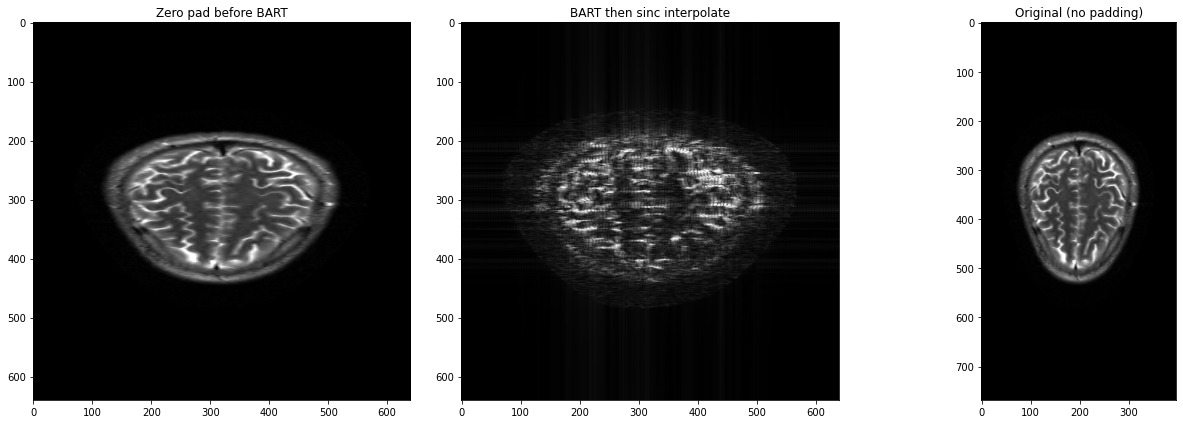

In [51]:
# Plot all three methods for comparison
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
titles = ["Zero pad before BART", "BART then sinc interpolate", "Original (no padding)"]

axs[0].imshow(cs_result_method1, cmap='gray')
axs[0].set_title(titles[0])

axs[1].imshow(cs_result_method2, cmap='gray')
axs[1].set_title(titles[1])

axs[2].imshow(cs_result_method3, cmap='gray')
axs[2].set_title(titles[2])

plt.tight_layout()
plt.show()

# !!plots are wrong, need to account for real matrices before zero-padding to not get a stretched image!

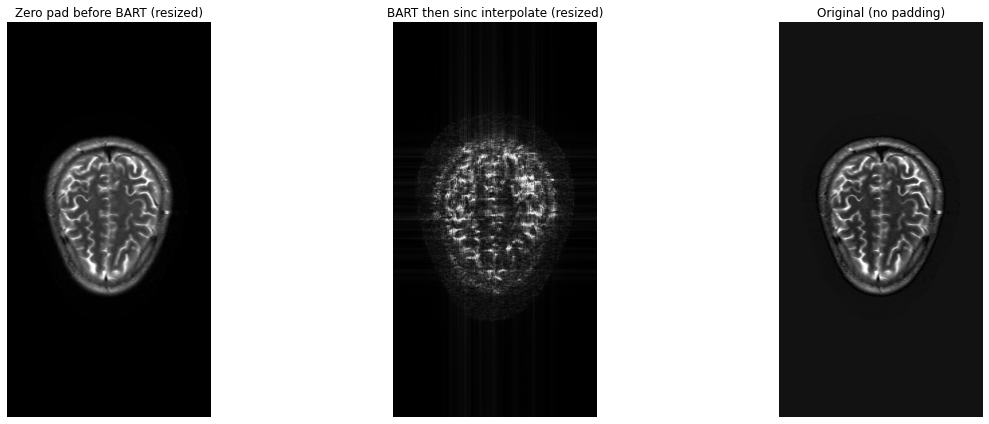

Mean absolute difference between method1 and original: 0.01818970963358879
Max absolute difference between method1 and original: 1.1057727336883545
Mean absolute difference between method2 and original: 0.29889124631881714
Max absolute difference between method2 and original: 6.065159797668457


In [52]:
# Alternative approach: Resize high-res images to match original dimensions
from skimage.transform import resize

# Plot all three methods for comparison
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
titles = ["Zero pad before BART", "BART then sinc interpolate", "Original (no padding)"]

# Resize high-res images to match original dimensions
cs_result_method1_resized = resize(cs_result_method1, cs_result_method3.shape, 
                                  anti_aliasing=True, preserve_range=True)
cs_result_method2_resized = resize(cs_result_method2, cs_result_method3.shape, 
                                  anti_aliasing=True, preserve_range=True)

axs[0].imshow(cs_result_method1_resized, cmap='gray')
axs[0].set_title(titles[0] + " (resized)")

axs[1].imshow(cs_result_method2_resized, cmap='gray')
axs[1].set_title(titles[1] + " (resized)")

axs[2].imshow(np.abs(cs_result_method3), cmap='gray')
axs[2].set_title(titles[2])

for ax in axs:
    ax.set_axis_off()

plt.tight_layout()
plt.show()

# compute difference between the results to check if they're equivalent
diff1 = np.abs(cs_result_method1_resized - cs_result_method3)
diff2 = np.abs(cs_result_method2_resized - cs_result_method3)
print(f"Mean absolute difference between method1 and original: {np.mean(diff1)}") 
print(f"Max absolute difference between method1 and original: {np.max(diff1)}")
print(f"Mean absolute difference between method2 and original: {np.mean(diff2)}")
print(f"Max absolute difference between method2 and original: {np.max(diff2)}")

Use Structural Similarity Index (SSIM)

In [53]:
### copied code from evaluate.py (has function for ssim)
from skimage.metrics import structural_similarity
from typing import Optional

def ssim(
    gt: np.ndarray, pred: np.ndarray, maxval: Optional[float] = None
) -> np.ndarray:
    """Compute Structural Similarity Index Metric (SSIM)"""
    if not gt.ndim == 3:
        raise ValueError("Unexpected number of dimensions in ground truth.")
    if not gt.ndim == pred.ndim:
        raise ValueError("Ground truth dimensions does not match pred.")

    maxval = gt.max() if maxval is None else maxval

    ssim = np.array([0])
    for slice_num in range(gt.shape[0]):
        ssim = ssim + structural_similarity(
            gt[slice_num], pred[slice_num], data_range=maxval
        )

    return ssim / gt.shape[0]

# Ensure the results are 3D by adding a dummy dimension
img1 = cs_result_method1_resized[np.newaxis, ...]  # Shape (1, H, W)
img2 = cs_result_method2_resized[np.newaxis, ...]  # Shape (1, H, W)
img_ref = cs_result_method3[np.newaxis, ...]  # Shape (1, H, W)

# Compute SSIM using your function
ssim1 = ssim(img_ref, img1)
ssim2 = ssim(img_ref, img2)

print(f"SSIM between Method 1 and Original: {ssim1[0]:.4f}")
print(f"SSIM between Method 2 and Original: {ssim2[0]:.4f}")


SSIM between Method 1 and Original: 0.9920
SSIM between Method 2 and Original: 0.6643


In [54]:
from skimage.metrics import structural_similarity as ssim

ssim1 = ssim((cs_result_method1_resized), (cs_result_method3), 
             data_range=(cs_result_method3).max())

ssim2 = ssim((cs_result_method2_resized), (cs_result_method3), 
             data_range=(cs_result_method3).max())

print(f"SSIM between Method 1 and Original: {ssim1:.4f}")
print(f"SSIM between Method 2 and Original: {ssim2:.4f}")


SSIM between Method 1 and Original: 0.9920
SSIM between Method 2 and Original: 0.6643


### Improved Ways to visually Compare the Methods

#### Visualizing Absolute Difference Maps (Best for Identifying Artifacts)

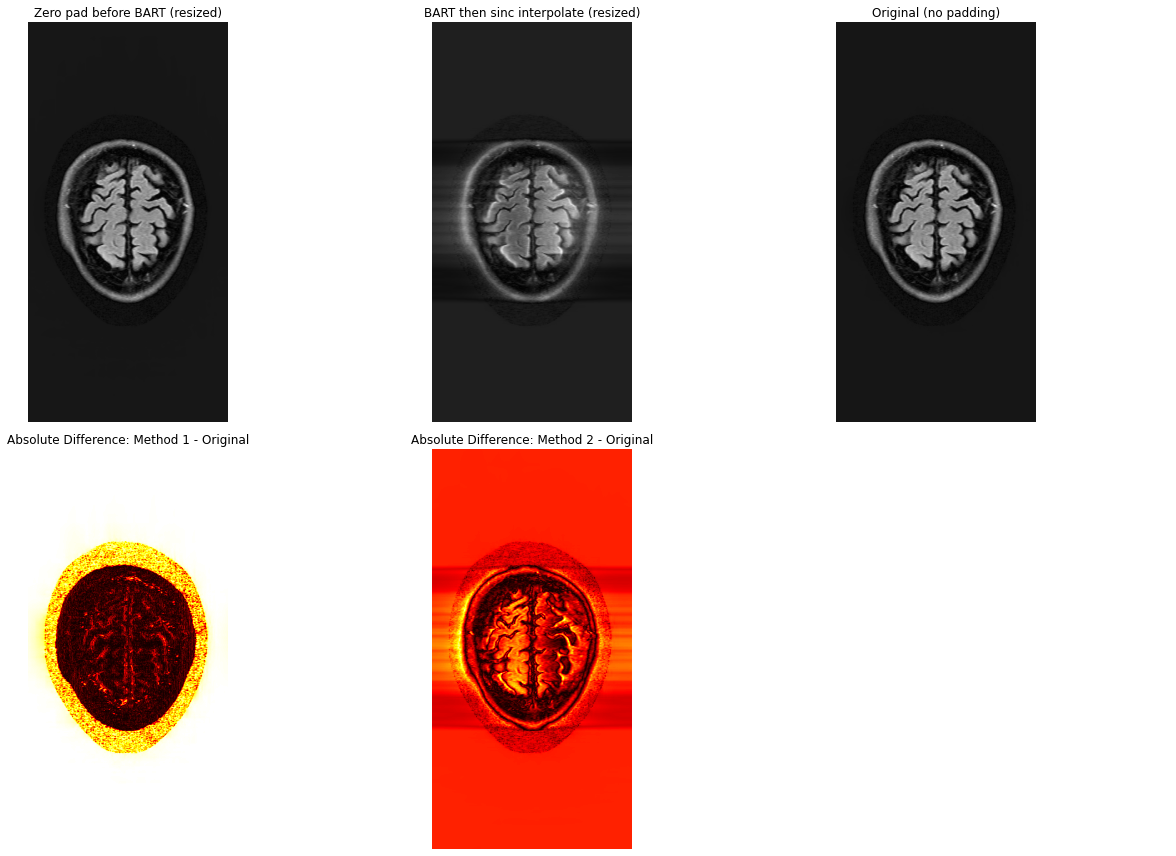

In [102]:
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

titles = [
    "Zero pad before BART (resized)", 
    "BART then sinc interpolate (resized)", 
    "Original (no padding)",
    "Absolute Difference: Method 1 - Original",
    "Absolute Difference: Method 2 - Original"
]

# First row: reconstructed images
axs[0, 0].imshow(cs_result_method1_resized, cmap='gray')
axs[0, 0].set_title(titles[0])

axs[0, 1].imshow(cs_result_method2_resized, cmap='gray')
axs[0, 1].set_title(titles[1])

axs[0, 2].imshow(np.abs(cs_result_method3), cmap='gray')
axs[0, 2].set_title(titles[2])

# Compute absolute difference
diff1 = np.abs(cs_result_method1_resized - cs_result_method3)
diff2 = np.abs(cs_result_method2_resized - cs_result_method3)

# Second row: absolute difference maps
axs[1, 0].imshow(diff1, cmap='hot')
axs[1, 0].set_title(titles[3])

axs[1, 1].imshow(diff2, cmap='hot')
axs[1, 1].set_title(titles[4])

axs[1, 2].axis("off")  # Leave one plot blank

# Hide axes
for ax in axs.flatten():
    ax.set_axis_off()

plt.tight_layout()
plt.show()

#### Are the differences intensity related? => need normalization or histogram matching to make the intensity distributions comparable

##### Histogram matching

Method 1 - Min: 0.001513, Max: 5.199852
Method 2 - Min: 0.011390, Max: 4.466312
Original - Min: 0.000008, Max: 5.354820


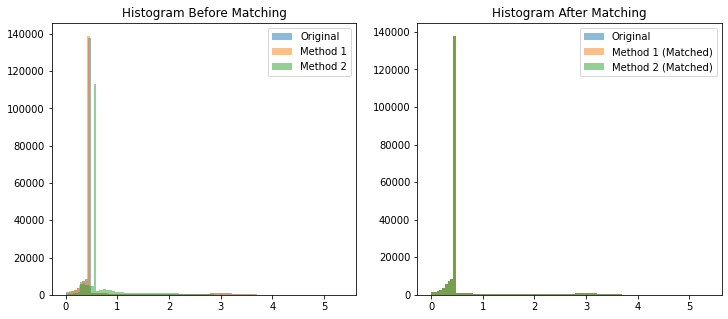

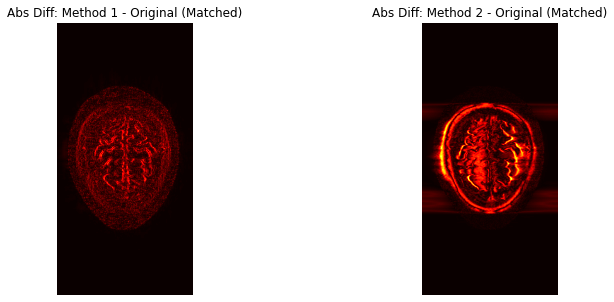

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.exposure import match_histograms

# Ensure images are non-zero
method1_real = np.abs(cs_result_method1_resized)
method2_real = np.abs(cs_result_method2_resized)
original_real = np.abs(cs_result_method3)

# Check for minimum and maximum values
print(f"Method 1 - Min: {method1_real.min():.6f}, Max: {method1_real.max():.6f}")
print(f"Method 2 - Min: {method2_real.min():.6f}, Max: {method2_real.max():.6f}")
print(f"Original - Min: {original_real.min():.6f}, Max: {original_real.max():.6f}")

# Apply histogram matching
method1_matched = match_histograms(method1_real, original_real)
method2_matched = match_histograms(method2_real, original_real)

# Compute absolute difference after histogram matching
abs_diff1 = np.abs(method1_matched - original_real)
abs_diff2 = np.abs(method2_matched - original_real)

# Plot histograms before and after matching
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(original_real.ravel(), bins=100, alpha=0.5, label="Original")
plt.hist(method1_real.ravel(), bins=100, alpha=0.5, label="Method 1")
plt.hist(method2_real.ravel(), bins=100, alpha=0.5, label="Method 2")
plt.legend()
plt.title("Histogram Before Matching")

plt.subplot(1, 2, 2)
plt.hist(original_real.ravel(), bins=100, alpha=0.5, label="Original")
plt.hist(method1_matched.ravel(), bins=100, alpha=0.5, label="Method 1 (Matched)")
plt.hist(method2_matched.ravel(), bins=100, alpha=0.5, label="Method 2 (Matched)")
plt.legend()
plt.title("Histogram After Matching")

plt.show()

# Plot absolute difference images
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
axs[0].imshow(abs_diff1, cmap="hot")
axs[0].set_title("Abs Diff: Method 1 - Original (Matched)")
axs[1].imshow(abs_diff2, cmap="hot")
axs[1].set_title("Abs Diff: Method 2 - Original (Matched)")

for ax in axs:
    ax.set_axis_off()

plt.show()


In [104]:
from skimage.metrics import structural_similarity as ssim

ssim1 = ssim(np.abs(method1_matched), np.abs(cs_result_method3), 
             data_range=np.abs(cs_result_method3).max() - np.abs(cs_result_method3).min())

ssim2 = ssim(np.abs(method2_matched), np.abs(cs_result_method3), 
             data_range=np.abs(cs_result_method3).max() - np.abs(cs_result_method3).min())

print(f"SSIM between Method 1 and Original: {ssim1:.4f}")
print(f"SSIM between Method 2 and Original: {ssim2:.4f}")

SSIM between Method 1 and Original: 0.9864
SSIM between Method 2 and Original: 0.8628


##### Min max normalization

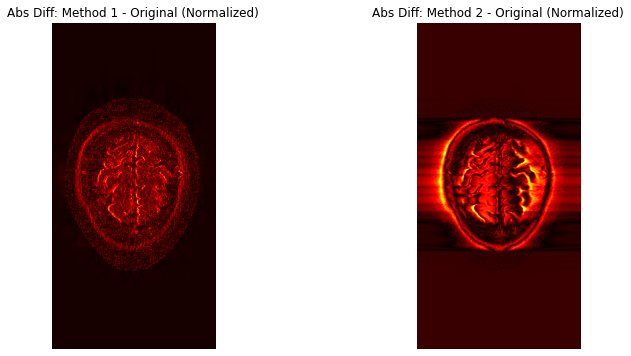

Method 1 - Mean: 0.006072, Std: 0.008737
Method 2 - Mean: 0.057904, Std: 0.056615


In [105]:
def min_max_normalize(image):
    return (image - np.min(image)) / (np.max(image) - np.min(image))

# Apply normalization to all images
original_norm = min_max_normalize(original_real)
method1_norm = min_max_normalize(method1_real)
method2_norm = min_max_normalize(method2_real)

# Compute absolute differences after normalization
diff1_norm = np.abs(method1_norm - original_norm)
diff2_norm = np.abs(method2_norm - original_norm)

# Display normalized absolute difference maps
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
axs[0].imshow(diff1_norm, cmap='hot')
axs[0].set_title("Abs Diff: Method 1 - Original (Normalized)")

axs[1].imshow(diff2_norm, cmap='hot')
axs[1].set_title("Abs Diff: Method 2 - Original (Normalized)")
for ax in axs:
    ax.set_axis_off()

plt.show()

# Compute new statistics
print(f"Method 1 - Mean: {np.mean(diff1_norm):.6f}, Std: {np.std(diff1_norm):.6f}")
print(f"Method 2 - Mean: {np.mean(diff2_norm):.6f}, Std: {np.std(diff2_norm):.6f}")


In [106]:
from skimage.metrics import structural_similarity as ssim

ssim_method1 = ssim(original_norm, method1_norm, data_range=1)
ssim_method2 = ssim(original_norm, method2_norm, data_range=1)

print(f"SSIM Method 1 vs Original: {ssim_method1:.6f}")
print(f"SSIM Method 2 vs Original: {ssim_method2:.6f}")


SSIM Method 1 vs Original: 0.986031
SSIM Method 2 vs Original: 0.824651


## Test for GPU usage bart (not possible)

Select a file

In [4]:
# Select a file and save in hf
file_name = 'file_brain_AXFLAIR_200_6002425.h5'
hf = h5py.File(os.path.join(train_path, file_name), 'r')

In [5]:
# Get k-space
from fastmri.data import transforms as T

kspace = hf['kspace'][()]
print("Shape of the raw kspace: ", str(np.shape(kspace)))
print("Datatype of the raw kspace: ", str(type(kspace)))

Shape of the raw kspace:  (16, 20, 640, 320)
Datatype of the raw kspace:  <class 'numpy.ndarray'>


Shape kspace = (number of slices, number of coils, height, width)

In [6]:
# First, we need to create 2 masked versions of k-space:
#   - We need to estimate our sensitivity maps as if we have undersampled data with an ACS region (using ESPIRiT)
#   - We need an actual CS undersampling pattern for the actual reconstruction pipeline itself

## Create ACS masked space for S_i
from fastmri.data.subsample import EquispacedMaskFunc

def apply_mask(slice_kspace, mask_func):
    ''' 
    Args:
        slice_kspace (numpy.array)
        mask_func (class)
    Returns:
        masked_kspace (numpy.array)
        mask (torch.tensor)
    '''
    slice_kspace_T = T.to_tensor(slice_kspace)
    masked_kspace_T, mask = T.apply_mask(slice_kspace_T, mask_func)
    masked_kspace = T.tensor_to_complex_np(masked_kspace_T)
    return masked_kspace, mask

mask_func = EquispacedMaskFunc(center_fractions=[0.08], accelerations=[4])
masked_kspace_ACS, mask_ACS = apply_mask(kspace, mask_func) # For validation data we should pass a seed though!

print("Shape of the generated mask: ", str(mask_ACS.shape))
print("Datatype of the generated mask: ", str(type(mask_ACS)))

Shape of the generated mask:  torch.Size([1, 1, 1, 320, 1])
Datatype of the generated mask:  <class 'torch.Tensor'>


In [7]:
## create real world CS undersampling 
# SELECT ACCELERATION FACTOR
R = 4

# get Real-life CS mask data
import scipy.io as sio
mat_file = sio.loadmat('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/fastMRI-hybrid-modelling/fastMRI/sampling_profiles_CS.mat')
mat_file.keys()

def closer_to_4_or_8(float):
    diff_4 = np.abs(float - 4)
    diff_8 = np.abs(float - 8)

    if diff_4 < diff_8:
        return int(4)
    elif diff_8 < diff_4:
        return int(8)

def generate_array(shape, R, mat_file, tensor_out):
    if R == 4:
        array = mat_file['m320_CS4_mask'].squeeze()
    elif R == 8:
        array = mat_file['m320_CS8_mask'].squeeze()
    else:
        raise ValueError('Unrecognized acceleration factor specified. Must be 4 or 8.')
    # Calculate padding needed to reach the desired length
    desired_length = shape[-1]
    padding_needed = desired_length - len(array)
    if padding_needed > 0:
        # Calculate padding width for symmetric padding
        padding_width = (padding_needed // 2, padding_needed - padding_needed // 2)
        # Pad the array symmetrically
        array = np.pad(array, padding_width, mode='symmetric')
    elif padding_needed < 0:
        # Calculate trimming indices for symmetric trimming
        trim_start = -padding_needed // 2
        trim_end = len(array) + padding_needed // 2
        # Trim the array symmetrically
        array = array[trim_start:trim_end]
    # Make array compatible with fastmri mask function class
    for i in range(len(shape)-1):
        array = np.expand_dims(array, 0)
    if tensor_out:
        array = T.to_tensor(array)
    return array

mask = generate_array(kspace.shape, R, mat_file, tensor_out=False)
masked_kspace = kspace * mask + 0.0

PERFORM BART reconstructions with zero-padded k-space (before and after )

In [15]:
import bart
print(bart.bart(1, "version -g"))

Exception: Command exited with an error.

In [14]:
import bart
import numpy as np
import time

def estimate_sensitivity_maps(kspace):
    ''' 
    Args:
        kspace (numpy.array): slice kspace of shape (num_coils, rows, cols)
    Returns:
        S (numpy.array): Estimated sensitivity maps given by ESPIRiT of shape (num_coils, rows, cols)
    '''
    # Move coil axis to the back as expected by BART
    kspace_perm = np.moveaxis(kspace, 0, 2)
    # Add extra dimension, because the ESPIRiT method expects a 4D input array where the third dimension represents the batch size.
    kspace_perm = np.expand_dims(kspace_perm, axis=2)
    # Estimate sensitivity maps with ESPIRiT method
    S = bart.bart(1, "ecalib -d0 -m1", kspace_perm)
    # Undo the previous operations to get the original data structure back
    S = np.moveaxis(S.squeeze(), 2, 0)
    return S

def CS(kspace, S, lamda=0.005, num_iter=50):
    ''' 
    Performs CS reconstruction
    https://mrirecon.github.io/bart/

    Args:
        kspace (numpy.array): Slice kspace of shape (num_coils, rows, cols)
        S (numpy.array): Estimated sensitivity maps given by ESPIRiT of shape (num_coils, rows, cols)
        lamda: Value of the hyperparameter / regularizer of the l1 norm term
        num_iter: The amount of iterations the algorithm can run
    Returns:
        reconstruction (numpy.array): Estimated CS reconstruction of shape (rows, cols))
    '''
    # Move coil axis to the back as expected by BART
    kspace_perm = np.moveaxis(kspace, 0, 2)
    S_perm = np.moveaxis(S, 0, 2)
    # Add extra dimension, because BART expects a 4D input array where the third dimension represents the batch size.
    kspace_perm = np.expand_dims(kspace_perm, axis=2)
    S_perm = np.expand_dims(S_perm, axis=2)

    # Perform CS
    reconstruction = bart.bart(1, 'pics -S -l1 -r {} -i {} -g'.format(lamda, num_iter), kspace_perm, S_perm)
        # -S = rescale image after reconstrucition
        # -l1 = l1 wavelet (other option is l2 regularization)
        # -r lambda = regularization parameter
        # -i iter = max number of iterations
    return reconstruction

middle_slice_idx = kspace.shape[0] // 2
# Method 3: Original reconstruction (no zero padding)
print("\nMethod 3: Original reconstruction (no zero padding)")
start_time = time.time()

# Get the middle slice (same as before)
middle_slice_kspace = masked_kspace[middle_slice_idx, :, :, :]
middle_slice_kspace_ACS = masked_kspace_ACS[middle_slice_idx, :, :, :]

# Estimate sensitivity maps and perform CS directly on original data
S_original = estimate_sensitivity_maps(middle_slice_kspace_ACS)
cs_result_method3 = CS(middle_slice_kspace, S_original)

method3_time = time.time() - start_time
print(f"Method 3 execution time: {method3_time:.4f} seconds")
print(f"Method 3 output shape: {cs_result_method3.shape}")


Method 3: Original reconstruction (no zero padding)


Exception: Command exited with an error.

## Test BART for all slices together: (worse!)

In [ ]:
# Select a file and save in hf
file_name = 'file_brain_AXFLAIR_200_6002425.h5'
hf = h5py.File(os.path.join(train_path, file_name), 'r')

# Get k-space
from fastmri.data import transforms as T

kspace = hf['kspace'][()]
print(kspace.shape)
# shape (num_slices, num_coils, rows, cols)

(16, 20, 640, 320)


In [124]:
# First, we need to create 2 masked versions of k-space:
#   - We need to estimate our sensitivity maps as if we have undersampled data with an ACS region (using ESPIRiT)
#   - We need an actual CS undersampling pattern for the actual reconstruction pipeline itself

## Create ACS masked space for S_i
from fastmri.data.subsample import EquispacedMaskFunc

def apply_mask(slice_kspace, mask_func):
    ''' 
    Args:
        slice_kspace (numpy.array)
        mask_func (class)
    Returns:
        masked_kspace (numpy.array)
        mask (torch.tensor)
    '''
    slice_kspace_T = T.to_tensor(slice_kspace)
    masked_kspace_T, mask = T.apply_mask(slice_kspace_T, mask_func)
    masked_kspace = T.tensor_to_complex_np(masked_kspace_T)
    return masked_kspace, mask

mask_func = EquispacedMaskFunc(center_fractions=[0.08], accelerations=[4])
masked_kspace_ACS, mask_ACS = apply_mask(kspace, mask_func) # For validation data we should pass a seed though!

print("Shape of the generated mask: ", str(mask_ACS.shape))
print("Datatype of the generated mask: ", str(type(mask_ACS)))

Shape of the generated mask:  torch.Size([1, 1, 1, 320, 1])
Datatype of the generated mask:  <class 'torch.Tensor'>


In [125]:
## create real world CS undersampling 
# SELECT ACCELERATION FACTOR
R = 4

# get Real-life CS mask data
import scipy.io as sio
mat_file = sio.loadmat('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/fastMRI-hybrid-modelling/fastMRI/sampling_profiles_CS.mat')
mat_file.keys()

def closer_to_4_or_8(float):
    diff_4 = np.abs(float - 4)
    diff_8 = np.abs(float - 8)

    if diff_4 < diff_8:
        return int(4)
    elif diff_8 < diff_4:
        return int(8)

def generate_array(shape, R, mat_file, tensor_out):
    if R == 4:
        array = mat_file['m320_CS4_mask'].squeeze()
    elif R == 8:
        array = mat_file['m320_CS8_mask'].squeeze()
    else:
        raise ValueError('Unrecognized acceleration factor specified. Must be 4 or 8.')
    # Calculate padding needed to reach the desired length
    desired_length = shape[-1]
    padding_needed = desired_length - len(array)
    if padding_needed > 0:
        # Calculate padding width for symmetric padding
        padding_width = (padding_needed // 2, padding_needed - padding_needed // 2)
        # Pad the array symmetrically
        array = np.pad(array, padding_width, mode='symmetric')
    elif padding_needed < 0:
        # Calculate trimming indices for symmetric trimming
        trim_start = -padding_needed // 2
        trim_end = len(array) + padding_needed // 2
        # Trim the array symmetrically
        array = array[trim_start:trim_end]
    # Make array compatible with fastmri mask function class
    for i in range(len(shape)-1):
        array = np.expand_dims(array, 0)
    if tensor_out:
        array = T.to_tensor(array)
    return array

mask = generate_array(kspace.shape, R, mat_file, tensor_out=False)
masked_kspace = kspace * mask + 0.0

estimating S for all 16 slices at once = 11min20 (20 threads = 5min)

In [126]:
import bart
# BART expects: (rows, cols, slices, coils)
# Move axes to BART format: 
masked_kspace_ACS_bart = np.transpose(masked_kspace_ACS, (2, 3, 0, 1))
print(masked_kspace_ACS_bart.shape)

S_bart = bart.bart(1, "ecalib -d0 -m1", masked_kspace_ACS_bart)
print(S_bart.shape)

S = np.transpose(S_bart, (2, 3, 0, 1))
print(S.shape)


(640, 320, 16, 20)
(640, 320, 16, 20)
(16, 20, 640, 320)


CS giving entire batch to bart: 3min44  (20 threads = 36s)

In [127]:
def CS_batch(kspace, S, lamda=0.005, num_iter=50):
    """
    Perform batch CS reconstruction using BART.
    Input shapes: (num_slices, num_coils, rows, cols)
    """  
    # kspace and S must match shape (slices, coils, rows, cols)"
    assert kspace.shape == S.shape 
    
    # BART expects: (rows, cols, slices, coils)
    # Move axes to BART format: 
    kspace_bart = np.transpose(kspace, (2, 3, 0, 1))
    S_bart = np.transpose(S, (2, 3, 0, 1))
 
    # Run batch reconstruction
    recon = bart.bart(1, f'pics -S -l1 -r {lamda} -i {num_iter} -d 0', kspace_bart, S_bart)

     # Output is (rows, cols, 1, slices) → squeeze and reorder
    recon = np.squeeze(recon)
    recon = np.transpose(recon, (2, 0, 1))  # -> (slices, rows, cols)

    return recon

recon_batch = CS_batch(masked_kspace, S, lamda=0.005, num_iter=50)

In [128]:
print(recon_batch.shape)
print(recon_batch[0].shape)

(16, 640, 320)
(640, 320)


estimate S for 1 slice = 10 sec (20 threads = 2s)

In [129]:
def estimate_sensitivity_maps(kspace):
    ''' 
    Args:
        kspace (numpy.array): slice kspace of shape (num_coils, rows, cols)
    Returns:
        S (numpy.array): Estimated sensitivity maps given by ESPIRiT of shape (num_coils, rows, cols)
    '''
    # Move coil axis to the back as expected by BART
    kspace_perm = np.moveaxis(kspace, 0, 2)
    # Add extra dimension, because the ESPIRiT method expects a 4D input array where the third dimension represents the batch size.
    kspace_perm = np.expand_dims(kspace_perm, axis=2)
    # Estimate sensitivity maps with ESPIRiT method
    S = bart.bart(1, "ecalib -d0 -m1", kspace_perm)
    # Undo the previous operations to get the original data structure back
    S = np.moveaxis(S.squeeze(), 2, 0)
    return S

# select slice
middle_slice_idx = kspace.shape[0] // 2
# Get the middle slice  
middle_slice_kspace = masked_kspace_ACS[middle_slice_idx, :, :, :]

S_1slice = estimate_sensitivity_maps(middle_slice_kspace)
print(S_1slice.shape)



(20, 640, 320)


estimate S for all slices, slice per slice 2m 44  (20 threds: 35s)

In [130]:
import numpy as np
S_slice = np.zeros_like(S, dtype=np.complex64)

for i in range(kspace.shape[0]):
    slice_masked_kspace_ACS = masked_kspace_ACS[i, :, :, :]
    S_slice[i] = estimate_sensitivity_maps(slice_masked_kspace_ACS)


CS done slice per slice 2m 49sec  (20 threads: 26s)

In [131]:
def CS(kspace, S, lamda=0.005, num_iter=50):
    ''' 
    Performs CS reconstruction
    https://mrirecon.github.io/bart/

    Args:
        kspace (numpy.array): Slice kspace of shape (num_coils, rows, cols)
        S (numpy.array): Estimated sensitivity maps given by ESPIRiT of shape (num_coils, rows, cols)
        lamda: Value of the hyperparameter / regularizer of the l1 norm term
        num_iter: The amount of iterations the algorithm can run
    Returns:
        reconstruction (numpy.array): Estimated CS reconstruction of shape (rows, cols))
    '''
    # Move coil axis to the back as expected by BART
    kspace_perm = np.moveaxis(kspace, 0, 2)
    S_perm = np.moveaxis(S, 0, 2)
    # Add extra dimension, because BART expects a 4D input array where the third dimension represents the batch size.
    kspace_perm = np.expand_dims(kspace_perm, axis=2)
    S_perm = np.expand_dims(S_perm, axis=2)
    # Perform CS
    reconstruction = bart.bart(1, 'pics -S -l1 -r {} -i {} -d 0'.format(lamda, num_iter), kspace_perm, S_perm)
    return reconstruction

recon_slice = np.zeros((kspace.shape[0], kspace.shape[2], kspace.shape[3]), dtype=np.complex64)

for i in range(kspace.shape[0]):
    # INDIVIDUAL sensitivity map
    S_i = S_slice[i,:,:,:]
    recon_slice[i] = CS(masked_kspace[i], S_i)

CS done slice per slice, 

but only using the middle coil sensitivities instead of all seperate ones

3 min (26s)

In [132]:
# select slice
middle_slice_idx = kspace.shape[0] // 2
# Get the middle slice  
middle_slice_kspace = masked_kspace_ACS[middle_slice_idx, :, :, :]
S_middle = estimate_sensitivity_maps(middle_slice_kspace)

In [133]:


recon_middle_S = np.zeros((kspace.shape[0], kspace.shape[2], kspace.shape[3]), dtype=np.complex64)
for i in range(kspace.shape[0]):

    # MIDDLE sensitivity map for all
    recon_middle_S[i] = CS(masked_kspace[i], S_middle)

### visualize results

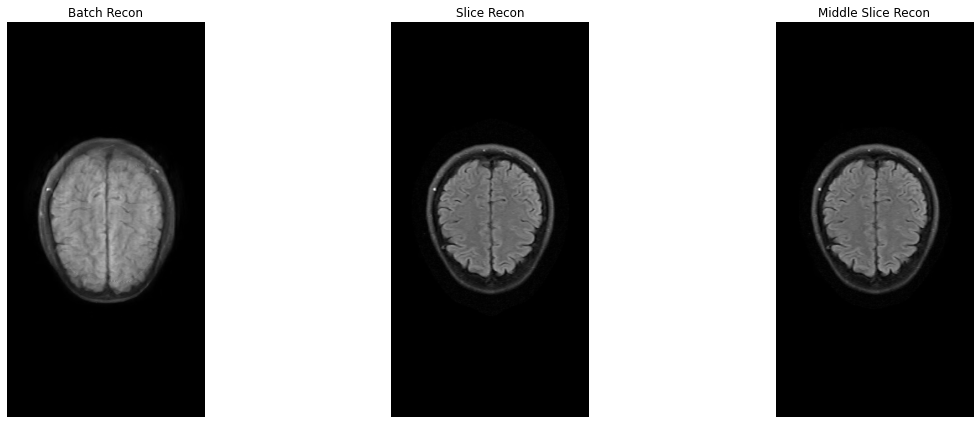

In [134]:
number_slice = 7
# Plot all three methods for comparison
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
titles = ["Batch Recon", "Slice Recon", "Middle Slice Recon"]

axs[0].imshow(np.abs(recon_batch[number_slice]), cmap='gray')
axs[0].set_title(titles[0])

axs[1].imshow(np.abs(recon_slice[number_slice]), cmap='gray')
axs[1].set_title(titles[1])

axs[2].imshow(np.abs(recon_middle_S[number_slice]), cmap='gray')
axs[2].set_title(titles[2])
for ax in axs:
    ax.set_axis_off()
plt.tight_layout()
plt.show()


conclude: per batch = worse + takes longer

## Test parallel processing of files => BEST = as much workers as possibles in parallel

In [15]:
import os
os.environ["OMP_NUM_THREADS"] = "2"  # or 2 if you have many processes
import h5py
import numpy as np
from pathlib import Path
from fastmri.data import transforms as T
from fastmri.data.subsample import EquispacedMaskFunc
import torch
import time
import gc
import random

import scipy.io as sio
import logging
from multiprocessing import Pool, cpu_count

## CONSTANTS
# Directory containing HDF5 files
INPUT_DIR = "/DATASERVER/MIC/SHARED/NYU_FastMRI/Preprocessed/multicoil_train"
files = list(Path(INPUT_DIR).glob("**/*.h5")) # Get all HDF5 files in the input directory
file_count = 1
OUTPUT_DIR = "/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test"
os.makedirs(OUTPUT_DIR, exist_ok=True) # Ensure output directory exists
TARGET_SIZE = (640, 640)
# matlab file with CS sampling profiles
mat_file = sio.loadmat('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/fastMRI-hybrid-modelling/fastMRI/sampling_profiles_CS.mat')

def fifty_fifty():
    '''
    Return True with a probability of 0.5, otherwise False
    '''
    return random.random() < .5

def apply_mask(slice_kspace, mask_func):
    ''' 
    Args:
        slice_kspace (numpy.array)
        mask_func (class)
    Returns:
        masked_kspace (numpy.array)
        mask (torch.tensor)
    '''
    slice_kspace_T = T.to_tensor(slice_kspace)
    masked_kspace_T, mask = T.apply_mask(slice_kspace_T, mask_func)
    # Convert masked k-space from Torch tensor back to numpy array
    masked_kspace = T.tensor_to_complex_np(masked_kspace_T)
    return masked_kspace, mask

def generate_array(shape, R, mat_file, tensor_out):
    '''
    Generate CS mask for given k_space shape and acceleration factor R
    Args:
        shape (tuple): Shape of the k-space data
        R (int): Acceleration factor
        mat_file: matlab file containing the CS masks
        tensor_out (bool): If True, the output will be a torch tensor
    Returns:
        array (numpy.array or torch.tensor): CS mask 
    '''
    if R == 4:
        array = mat_file['m320_CS4_mask'].squeeze()
    elif R == 8:
        array = mat_file['m320_CS8_mask'].squeeze()
    else:
        raise ValueError('Unrecognized acceleration factor specified. Must be 4 or 8.')
    # Calculate padding needed to reach the desired length
    desired_length = shape[-1]
    padding_needed = desired_length - len(array)
    if padding_needed > 0:
        # Calculate padding width for symmetric padding
        padding_width = (padding_needed // 2, padding_needed - padding_needed // 2)
        # Pad the array symmetrically
        array = np.pad(array, padding_width, mode='symmetric')
    elif padding_needed < 0:
        # Calculate trimming indices for symmetric trimming
        trim_start = -padding_needed // 2
        trim_end = len(array) + padding_needed // 2
        # Trim the array symmetrically
        array = array[trim_start:trim_end]

    # Make array compatible with fastmri mask function class
    for i in range(len(shape)-1):
        array = np.expand_dims(array, 0)
    if tensor_out:
        array = T.to_tensor(array)
    return array

def estimate_sensitivity_maps(kspace):
    ''' 
    Args:
        kspace (numpy.array): slice kspace of shape (num_coils, rows, cols)
    Returns:
        S (numpy.array): Estimated sensitivity maps given by ESPIRiT of shape (num_coils, rows, cols)
    '''
    import bart  # Make sure this is imported AFTER setting the env var
    # Move coil axis to the back as expected by BART
    kspace_perm = np.moveaxis(kspace, 0, 2)
    # Add extra dimension, because the ESPIRiT method expects a 4D input array where the third dimension represents the batch size.
    kspace_perm = np.expand_dims(kspace_perm, axis=2)
    # Estimate sensitivity maps with ESPIRiT method
    S = bart.bart(1, "ecalib -d0 -m1", kspace_perm)
    # Undo the previous operations to get the original data structure back
    S = np.moveaxis(S.squeeze(), 2, 0)
    return S

def zero_pad_kspace(kspace, target_size):
    """
    Zero-pad k-space to achieve sinc interpolation in image domain
    
    Args:
        kspace (numpy.array): K-space data (can be 2D or 3D with num_coils)
        target_size (tuple): Target size (rows, cols)
    
    Returns:
        kspace_padded (numpy.array): Zero-padded k-space
    """
    is_3d = len(kspace.shape) == 3  # Check if num_coils dimension exists
    if not is_3d:
        kspace = kspace[np.newaxis, ...]  # Add dummy coil dimension

    rows, cols = kspace.shape[-2], kspace.shape[-1]
    target_rows, target_cols = target_size

    # Convert k-space to fastMRI expected format (real, imag) -> shape (num_coils, rows, cols, 2)
    kspace_tensor = T.to_tensor(kspace)

     # Handle cropping if the size is too large
    if rows > target_rows and cols > target_cols:
        kspace_tensor = T.complex_center_crop(kspace_tensor, target_size)
        rows = target_rows
        cols = target_cols

     # if only 1 dimension is too large, crop that dimension   
    if rows > target_rows:
        kspace_tensor = T.complex_center_crop(kspace_tensor, (target_rows, cols))
        rows = target_rows
    
    if cols > target_cols:
        kspace_tensor = T.complex_center_crop(kspace_tensor, (rows, target_cols))
        cols = target_cols

    # Handle zero-padding if the size is too small
    if rows < target_rows or cols < target_cols:
        pad_rows = target_rows - rows
        pad_cols = target_cols - cols
        
        pad_top = pad_rows // 2
        pad_bottom = pad_rows - pad_top
        pad_left = pad_cols // 2
        pad_right = pad_cols - pad_left
        
        # Apply zero padding to 3D array
        kspace_tensor = torch.nn.functional.pad(
            kspace_tensor, (0, 0, pad_left, pad_right, pad_top, pad_bottom)
        )

    kspace_padded = T.tensor_to_complex_np(kspace_tensor)
    return kspace_padded if is_3d else kspace_padded[0]  # Remove dummy coil dimension if needed

def CS(kspace, S, lamda=0.005, num_iter=50):
    ''' 
    Performs CS reconstruction
    https://mrirecon.github.io/bart/

    Args:
        kspace (numpy.array): Slice kspace of shape (num_coils, rows, cols)
        S (numpy.array): Estimated sensitivity maps given by ESPIRiT of shape (num_coils, rows, cols)
        lamda: Value of the hyperparameter / regularizer of the l1 norm term
        num_iter: The amount of iterations the algorithm can run
    Returns:
        reconstruction (numpy.array): Estimated CS reconstruction of shape (rows, cols))
    '''
    import bart  # Make sure this is imported AFTER setting the env var
    # Move coil axis to the back as expected by BART
    kspace_perm = np.moveaxis(kspace, 0, 2)
    S_perm = np.moveaxis(S, 0, 2)
    # Add extra dimension, because BART expects a 4D input array where the third dimension represents the batch size.
    kspace_perm = np.expand_dims(kspace_perm, axis=2)
    S_perm = np.expand_dims(S_perm, axis=2)
    # Perform CS
    reconstruction = bart.bart(1, 'pics -S -l1 -r {} -i {} -d 0'.format(lamda, num_iter), kspace_perm, S_perm)
    return reconstruction

def process_file(file_index_tuple):
    # Set the number of threads BEFORE ANYTHING ELSE
    #os.environ["OMP_NUM_THREADS"] = "4"  # use 4 threads per process

    file_count, file = file_index_tuple  # UNPACK HERE

    print(f"Processing ({file_count}) {file.name} with PID {os.getpid()}")
    
    # Timer for the entire file
    start_time_file = time.time()   

    # Open HDF5 file in read mode
    with h5py.File(file, 'r') as hf:
        kspace = hf['kspace'][()]

    # Randomly decide if R = 4 or 8 for equispaced mask => ACS region for estimating coil sensitivities! 
    undersampling_bool = fifty_fifty()  
    if undersampling_bool:
        mask_func = EquispacedMaskFunc(center_fractions=[0.08], accelerations=[4])
    else:
        mask_func = EquispacedMaskFunc(center_fractions=[0.04], accelerations=[8])
    masked_kspace_ACS, mask_ACS = apply_mask(kspace, mask_func)
    #print("Shape of the generated ACS mask: ", str(mask_ACS.shape))

    # same random if R = 4 or 8 for CS mask
    if undersampling_bool:
        mask = generate_array(kspace.shape, 4, mat_file, tensor_out=False)
    else:
        mask = generate_array(kspace.shape, 8, mat_file, tensor_out=False)
    # (following = OK, see Transforms.apply_mask)
    masked_kspace = kspace * mask + 0.0   # +0.0 removes the sign of the zeros
    #print("Shape of the generated CS mask: ", str(mask.shape))


    ##################### CHANGED: SO WORKS WITH zero-padding/cropping BEFORE BART ############
    # Perform CS reconstruction
    cs_data = np.zeros((kspace.shape[0], TARGET_SIZE[0], TARGET_SIZE[1]), dtype=np.complex64)
    for slice in range(kspace.shape[0]):
        # timer for each slice
        start_time_slice = time.time()

        # Zero-fill/crop before ESPIRiT sensitivity estimation
        padded_kspace_ACS = zero_pad_kspace(masked_kspace_ACS[slice, :, :, :], TARGET_SIZE)
        padded_kspace = zero_pad_kspace(masked_kspace[slice, :, :, :], TARGET_SIZE)
        #print("Shape of the padded kspace: ", str(np.shape(padded_kspace)))

        # Estimate sensitivity maps
        S_padded = estimate_sensitivity_maps(padded_kspace_ACS) # estimate Si with ACS region

        # Perform CS reconstruction with zero-filled k-space
        cs_data[slice, :, :] = CS(padded_kspace, S_padded)
        end_time_slice = time.time()
        elapsed_time_slice = end_time_slice - start_time_slice
        print(f"Time for slice of {file.name}: {elapsed_time_slice:.4f} seconds")
    #print("Shape of the numpy-converted CS data: ", str(cs_data.shape))

    # Save file to given output DIR 
    ## stem attribute gives the base name of the file without the extension. 
    # For example: If your input file is named sample_data.h5, file.stem will return sample_data
    output_file = os.path.join(OUTPUT_DIR, file.stem + "_cs.npy")
    np.save(output_file, cs_data)

    # Free up memory and go to next file
    time.sleep(1) 
    del kspace, masked_kspace, mask, cs_data    # Delete the variables to free up memory
    time.sleep(1)
    gc.collect()    # Collect garbage to free up memory

    # Timer for the entire file: calculate and print total elapsed time after all slices
    end_time_file = time.time()
    elapsed_time_file = end_time_file - start_time_file
    print(f"Total time for processing {file.name}: {elapsed_time_file:.4f} seconds")

    return output_file  

def run_parallel(files, max_files=None, num_workers=None):
    if max_files:
        files = files[:max_files]

    num_workers = num_workers or min(cpu_count(), num_workers)  # Don't oversubscribe threads
    print(f"Using {num_workers} parallel workers")

    file_index_tuples = list(enumerate(files, start=1))

    with Pool(processes=num_workers) as pool:
        results = pool.map(process_file, file_index_tuples)

    return results

run_parallel(files, 12, 4)


#! Always set OMP_NUM_THREADS inside the function, not globally 
# — it must be set before the C-libs (like FFTW) are loaded in that process.

Using 4 parallel workers
Processing (2) file_brain_AXT2_209_2090051.h5 with PID 448270Processing (1) file_brain_AXT2_207_2070515.h5 with PID 448269Processing (4) file_brain_AXFLAIR_202_6000472.h5 with PID 448272Processing (3) file_brain_AXT1POST_210_6001620.h5 with PID 448271



Time for slice of file_brain_AXT2_207_2070515.h5: 5.1003 seconds
Time for slice of file_brain_AXT2_207_2070515.h5: 4.5063 seconds
Time for slice of file_brain_AXT2_207_2070515.h5: 4.9228 seconds
Time for slice of file_brain_AXT2_209_2090051.h5: 16.2635 seconds
Time for slice of file_brain_AXT2_207_2070515.h5: 5.2390 seconds
Time for slice of file_brain_AXT2_207_2070515.h5: 4.6193 seconds
Time for slice of file_brain_AXT1POST_210_6001620.h5: 22.1979 seconds
Time for slice of file_brain_AXT2_207_2070515.h5: 5.1006 seconds
Time for slice of file_brain_AXFLAIR_202_6000472.h5: 28.3850 seconds
Time for slice of file_brain_AXT2_207_2070515.h5: 4.9487 seconds
Time for slice of file_brain_AXT2_209_2090051.h5: 16.4031 se

['/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT2_207_2070515_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT2_209_2090051_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT1POST_210_6001620_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXFLAIR_202_6000472_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT1PRE_205_6000021_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT2_210_6001634_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT2_204_2040058_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT2_202_2020162_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT2_210_6001784_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT2_200_6002587_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/asloc

now did 7min 30 for 4 files with 2 workers

20 min 12 for 12 files with 4 workers (each 2 threads)

23 min 12 for 12 files with 2 workers (each 4 threads)

20 min 30 for 12 files with 8 workers (each 1 thread) => as good as above + amount of files not even ideal for it!

31 min for 12 files with 1 worker (with 8 threads)

In [17]:
import os
os.environ["OMP_NUM_THREADS"] = "1"  # or 2 if you have many processes
import h5py
import numpy as np
from pathlib import Path
from fastmri.data import transforms as T
from fastmri.data.subsample import EquispacedMaskFunc
import torch
import time
import gc
import random

import scipy.io as sio
import logging
from multiprocessing import Pool, cpu_count

## CONSTANTS
# Directory containing HDF5 files
INPUT_DIR = "/DATASERVER/MIC/SHARED/NYU_FastMRI/Preprocessed/multicoil_train"
files = list(Path(INPUT_DIR).glob("**/*.h5")) # Get all HDF5 files in the input directory
file_count = 1
OUTPUT_DIR = "/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test"
os.makedirs(OUTPUT_DIR, exist_ok=True) # Ensure output directory exists
TARGET_SIZE = (640, 640)
# matlab file with CS sampling profiles
mat_file = sio.loadmat('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/fastMRI-hybrid-modelling/fastMRI/sampling_profiles_CS.mat')

def fifty_fifty():
    '''
    Return True with a probability of 0.5, otherwise False
    '''
    return random.random() < .5

def apply_mask(slice_kspace, mask_func):
    ''' 
    Args:
        slice_kspace (numpy.array)
        mask_func (class)
    Returns:
        masked_kspace (numpy.array)
        mask (torch.tensor)
    '''
    slice_kspace_T = T.to_tensor(slice_kspace)
    masked_kspace_T, mask = T.apply_mask(slice_kspace_T, mask_func)
    # Convert masked k-space from Torch tensor back to numpy array
    masked_kspace = T.tensor_to_complex_np(masked_kspace_T)
    return masked_kspace, mask

def generate_array(shape, R, mat_file, tensor_out):
    '''
    Generate CS mask for given k_space shape and acceleration factor R
    Args:
        shape (tuple): Shape of the k-space data
        R (int): Acceleration factor
        mat_file: matlab file containing the CS masks
        tensor_out (bool): If True, the output will be a torch tensor
    Returns:
        array (numpy.array or torch.tensor): CS mask 
    '''
    if R == 4:
        array = mat_file['m320_CS4_mask'].squeeze()
    elif R == 8:
        array = mat_file['m320_CS8_mask'].squeeze()
    else:
        raise ValueError('Unrecognized acceleration factor specified. Must be 4 or 8.')
    # Calculate padding needed to reach the desired length
    desired_length = shape[-1]
    padding_needed = desired_length - len(array)
    if padding_needed > 0:
        # Calculate padding width for symmetric padding
        padding_width = (padding_needed // 2, padding_needed - padding_needed // 2)
        # Pad the array symmetrically
        array = np.pad(array, padding_width, mode='symmetric')
    elif padding_needed < 0:
        # Calculate trimming indices for symmetric trimming
        trim_start = -padding_needed // 2
        trim_end = len(array) + padding_needed // 2
        # Trim the array symmetrically
        array = array[trim_start:trim_end]

    # Make array compatible with fastmri mask function class
    for i in range(len(shape)-1):
        array = np.expand_dims(array, 0)
    if tensor_out:
        array = T.to_tensor(array)
    return array

def estimate_sensitivity_maps(kspace):
    ''' 
    Args:
        kspace (numpy.array): slice kspace of shape (num_coils, rows, cols)
    Returns:
        S (numpy.array): Estimated sensitivity maps given by ESPIRiT of shape (num_coils, rows, cols)
    '''
    import bart  # Make sure this is imported AFTER setting the env var
    # Move coil axis to the back as expected by BART
    kspace_perm = np.moveaxis(kspace, 0, 2)
    # Add extra dimension, because the ESPIRiT method expects a 4D input array where the third dimension represents the batch size.
    kspace_perm = np.expand_dims(kspace_perm, axis=2)
    # Estimate sensitivity maps with ESPIRiT method
    S = bart.bart(1, "ecalib -d0 -m1", kspace_perm)
    # Undo the previous operations to get the original data structure back
    S = np.moveaxis(S.squeeze(), 2, 0)
    return S

def zero_pad_kspace(kspace, target_size):
    """
    Zero-pad k-space to achieve sinc interpolation in image domain
    
    Args:
        kspace (numpy.array): K-space data (can be 2D or 3D with num_coils)
        target_size (tuple): Target size (rows, cols)
    
    Returns:
        kspace_padded (numpy.array): Zero-padded k-space
    """
    is_3d = len(kspace.shape) == 3  # Check if num_coils dimension exists
    if not is_3d:
        kspace = kspace[np.newaxis, ...]  # Add dummy coil dimension

    rows, cols = kspace.shape[-2], kspace.shape[-1]
    target_rows, target_cols = target_size

    # Convert k-space to fastMRI expected format (real, imag) -> shape (num_coils, rows, cols, 2)
    kspace_tensor = T.to_tensor(kspace)

     # Handle cropping if the size is too large
    if rows > target_rows and cols > target_cols:
        kspace_tensor = T.complex_center_crop(kspace_tensor, target_size)
        rows = target_rows
        cols = target_cols

     # if only 1 dimension is too large, crop that dimension   
    if rows > target_rows:
        kspace_tensor = T.complex_center_crop(kspace_tensor, (target_rows, cols))
        rows = target_rows
    
    if cols > target_cols:
        kspace_tensor = T.complex_center_crop(kspace_tensor, (rows, target_cols))
        cols = target_cols

    # Handle zero-padding if the size is too small
    if rows < target_rows or cols < target_cols:
        pad_rows = target_rows - rows
        pad_cols = target_cols - cols
        
        pad_top = pad_rows // 2
        pad_bottom = pad_rows - pad_top
        pad_left = pad_cols // 2
        pad_right = pad_cols - pad_left
        
        # Apply zero padding to 3D array
        kspace_tensor = torch.nn.functional.pad(
            kspace_tensor, (0, 0, pad_left, pad_right, pad_top, pad_bottom)
        )

    kspace_padded = T.tensor_to_complex_np(kspace_tensor)
    return kspace_padded if is_3d else kspace_padded[0]  # Remove dummy coil dimension if needed

def CS(kspace, S, lamda=0.005, num_iter=50):
    ''' 
    Performs CS reconstruction
    https://mrirecon.github.io/bart/

    Args:
        kspace (numpy.array): Slice kspace of shape (num_coils, rows, cols)
        S (numpy.array): Estimated sensitivity maps given by ESPIRiT of shape (num_coils, rows, cols)
        lamda: Value of the hyperparameter / regularizer of the l1 norm term
        num_iter: The amount of iterations the algorithm can run
    Returns:
        reconstruction (numpy.array): Estimated CS reconstruction of shape (rows, cols))
    '''
    import bart  # Make sure this is imported AFTER setting the env var
    # Move coil axis to the back as expected by BART
    kspace_perm = np.moveaxis(kspace, 0, 2)
    S_perm = np.moveaxis(S, 0, 2)
    # Add extra dimension, because BART expects a 4D input array where the third dimension represents the batch size.
    kspace_perm = np.expand_dims(kspace_perm, axis=2)
    S_perm = np.expand_dims(S_perm, axis=2)
    # Perform CS
    reconstruction = bart.bart(1, 'pics -S -l1 -r {} -i {} -d 0'.format(lamda, num_iter), kspace_perm, S_perm)
    return reconstruction

def process_file(file_index_tuple):
    # Set the number of threads BEFORE ANYTHING ELSE
    #os.environ["OMP_NUM_THREADS"] = "4"  # use 4 threads per process

    file_count, file = file_index_tuple  # UNPACK HERE

    print(f"Processing ({file_count}) {file.name} with PID {os.getpid()}")
    
    # Timer for the entire file
    start_time_file = time.time()   

    # Open HDF5 file in read mode
    with h5py.File(file, 'r') as hf:
        kspace = hf['kspace'][()]

    # Randomly decide if R = 4 or 8 for equispaced mask => ACS region for estimating coil sensitivities! 
    undersampling_bool = fifty_fifty()  
    if undersampling_bool:
        mask_func = EquispacedMaskFunc(center_fractions=[0.08], accelerations=[4])
    else:
        mask_func = EquispacedMaskFunc(center_fractions=[0.04], accelerations=[8])
    masked_kspace_ACS, mask_ACS = apply_mask(kspace, mask_func)
    #print("Shape of the generated ACS mask: ", str(mask_ACS.shape))

    # same random if R = 4 or 8 for CS mask
    if undersampling_bool:
        mask = generate_array(kspace.shape, 4, mat_file, tensor_out=False)
    else:
        mask = generate_array(kspace.shape, 8, mat_file, tensor_out=False)
    # (following = OK, see Transforms.apply_mask)
    masked_kspace = kspace * mask + 0.0   # +0.0 removes the sign of the zeros
    #print("Shape of the generated CS mask: ", str(mask.shape))


    ##################### CHANGED: SO WORKS WITH zero-padding/cropping BEFORE BART ############
    # Perform CS reconstruction
    cs_data = np.zeros((kspace.shape[0], TARGET_SIZE[0], TARGET_SIZE[1]), dtype=np.complex64)
    for slice in range(kspace.shape[0]):
        # timer for each slice
        start_time_slice = time.time()

        # Zero-fill/crop before ESPIRiT sensitivity estimation
        padded_kspace_ACS = zero_pad_kspace(masked_kspace_ACS[slice, :, :, :], TARGET_SIZE)
        padded_kspace = zero_pad_kspace(masked_kspace[slice, :, :, :], TARGET_SIZE)
        #print("Shape of the padded kspace: ", str(np.shape(padded_kspace)))

        # Estimate sensitivity maps
        S_padded = estimate_sensitivity_maps(padded_kspace_ACS) # estimate Si with ACS region

        # Perform CS reconstruction with zero-filled k-space
        cs_data[slice, :, :] = CS(padded_kspace, S_padded)
        end_time_slice = time.time()
        elapsed_time_slice = end_time_slice - start_time_slice
        print(f"Time for slice of {file.name}: {elapsed_time_slice:.4f} seconds")
    #print("Shape of the numpy-converted CS data: ", str(cs_data.shape))

    # Save file to given output DIR 
    ## stem attribute gives the base name of the file without the extension. 
    # For example: If your input file is named sample_data.h5, file.stem will return sample_data
    output_file = os.path.join(OUTPUT_DIR, file.stem + "_cs.npy")
    np.save(output_file, cs_data)

    # Free up memory and go to next file
    time.sleep(1) 
    del kspace, masked_kspace, mask, cs_data    # Delete the variables to free up memory
    time.sleep(1)
    gc.collect()    # Collect garbage to free up memory

    # Timer for the entire file: calculate and print total elapsed time after all slices
    end_time_file = time.time()
    elapsed_time_file = end_time_file - start_time_file
    print(f"Total time for processing {file.name}: {elapsed_time_file:.4f} seconds")

    return output_file  

def run_parallel(files, max_files=None, num_workers=None):
    if max_files:
        files = files[:max_files]

    num_workers = num_workers or min(cpu_count(), num_workers)  # Don't oversubscribe threads
    print(f"Using {num_workers} parallel workers")

    file_index_tuples = list(enumerate(files, start=1))

    with Pool(processes=num_workers) as pool:
        results = pool.map(process_file, file_index_tuples)

    return results

run_parallel(files, 12, 8)


#! Always set OMP_NUM_THREADS inside the function, not globally 
# — it must be set before the C-libs (like FFTW) are loaded in that process.

Using 8 parallel workers


Processing (3) file_brain_AXT1POST_210_6001620.h5 with PID 550619Processing (2) file_brain_AXT2_209_2090051.h5 with PID 550618Processing (1) file_brain_AXT2_207_2070515.h5 with PID 550617Processing (4) file_brain_AXFLAIR_202_6000472.h5 with PID 550620Processing (5) file_brain_AXT1PRE_205_6000021.h5 with PID 550621Processing (6) file_brain_AXT2_210_6001634.h5 with PID 550622Processing (7) file_brain_AXT2_204_2040058.h5 with PID 550623Processing (8) file_brain_AXT2_202_2020162.h5 with PID 550624







Time for slice of file_brain_AXT2_207_2070515.h5: 8.8026 seconds
Time for slice of file_brain_AXT2_207_2070515.h5: 9.2710 seconds
Time for slice of file_brain_AXT2_207_2070515.h5: 9.0028 seconds
Time for slice of file_brain_AXT2_209_2090051.h5: 28.6040 seconds
Time for slice of file_brain_AXT2_207_2070515.h5: 9.1519 seconds
Time for slice of file_brain_AXT1PRE_205_6000021.h5: 38.1827 seconds
Time for slice of file_brain_AXT2_202_2020162.h5: 37.7611 seconds
Time for slice of file_brain_AXT1

['/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT2_207_2070515_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT2_209_2090051_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT1POST_210_6001620_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXFLAIR_202_6000472_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT1PRE_205_6000021_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT2_210_6001634_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT2_204_2040058_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT2_202_2020162_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT2_210_6001784_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test/file_brain_AXT2_200_6002587_cs.npy',
 '/DATASERVER/MIC/GENERAL/STUDENTS/asloc

In [18]:
import h5py
import numpy as np
from pathlib import Path
from fastmri.data import transforms as T
from fastmri.data.subsample import EquispacedMaskFunc
import torch
import time
import gc
import bart
import scipy.io as sio
import random
import os
import logging

logging.basicConfig(filename='processingBRAIN.log', level=logging.INFO)
logging.info('Started processing')

# Set number of CPU threads to 20
os.environ["OMP_NUM_THREADS"] = "8"

# matlab file with CS sampling profiles
mat_file = sio.loadmat('/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/fastMRI-hybrid-modelling/fastMRI/sampling_profiles_CS.mat')

# Directory containing HDF5 files
INPUT_DIR = "/DATASERVER/MIC/SHARED/NYU_FastMRI/Preprocessed/multicoil_train"

# Get all HDF5 files in the input directory
files = list(Path(INPUT_DIR).glob("**/*.h5"))
file_count = 1

# Output directory for CS data
OUTPUT_DIR = "/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/test2"

# Ensure output directory exists
os.makedirs(OUTPUT_DIR, exist_ok=True)

def fifty_fifty():
    '''
    Return True with a probability of 0.5, otherwise False
    '''
    return random.random() < .5

def apply_mask(slice_kspace, mask_func):
    ''' 
    Args:
        slice_kspace (numpy.array)
        mask_func (class)
    Returns:
        masked_kspace (numpy.array)
        mask (torch.tensor)
    '''
    slice_kspace_T = T.to_tensor(slice_kspace)
    masked_kspace_T, mask = T.apply_mask(slice_kspace_T, mask_func)
    # Convert masked k-space from Torch tensor back to numpy array
    masked_kspace = T.tensor_to_complex_np(masked_kspace_T)
    return masked_kspace, mask

def generate_array(shape, R, mat_file, tensor_out):
    '''
    Generate CS mask for given k_space shape and acceleration factor R
    Args:
        shape (tuple): Shape of the k-space data
        R (int): Acceleration factor
        mat_file: matlab file containing the CS masks
        tensor_out (bool): If True, the output will be a torch tensor
    Returns:
        array (numpy.array or torch.tensor): CS mask 
    '''
    if R == 4:
        array = mat_file['m320_CS4_mask'].squeeze()
    elif R == 8:
        array = mat_file['m320_CS8_mask'].squeeze()
    else:
        raise ValueError('Unrecognized acceleration factor specified. Must be 4 or 8.')
    # Calculate padding needed to reach the desired length
    desired_length = shape[-1]
    padding_needed = desired_length - len(array)
    if padding_needed > 0:
        # Calculate padding width for symmetric padding
        padding_width = (padding_needed // 2, padding_needed - padding_needed // 2)
        # Pad the array symmetrically
        array = np.pad(array, padding_width, mode='symmetric')
    elif padding_needed < 0:
        # Calculate trimming indices for symmetric trimming
        trim_start = -padding_needed // 2
        trim_end = len(array) + padding_needed // 2
        # Trim the array symmetrically
        array = array[trim_start:trim_end]

    # Make array compatible with fastmri mask function class
    for i in range(len(shape)-1):
        array = np.expand_dims(array, 0)
    if tensor_out:
        array = T.to_tensor(array)
    return array

def estimate_sensitivity_maps(kspace):
    ''' 
    Args:
        kspace (numpy.array): slice kspace of shape (num_coils, rows, cols)
    Returns:
        S (numpy.array): Estimated sensitivity maps given by ESPIRiT of shape (num_coils, rows, cols)
    '''
    # Move coil axis to the back as expected by BART
    kspace_perm = np.moveaxis(kspace, 0, 2)
    # Add extra dimension, because the ESPIRiT method expects a 4D input array where the third dimension represents the batch size.
    kspace_perm = np.expand_dims(kspace_perm, axis=2)
    # Estimate sensitivity maps with ESPIRiT method
    S = bart.bart(1, "ecalib -d0 -m1", kspace_perm)
    # Undo the previous operations to get the original data structure back
    S = np.moveaxis(S.squeeze(), 2, 0)
    return S

def zero_pad_kspace(kspace, target_size):
    """
    Zero-pad k-space to achieve sinc interpolation in image domain
    
    Args:
        kspace (numpy.array): K-space data (can be 2D or 3D with num_coils)
        target_size (tuple): Target size (rows, cols)
    
    Returns:
        kspace_padded (numpy.array): Zero-padded k-space
    """
    is_3d = len(kspace.shape) == 3  # Check if num_coils dimension exists
    if not is_3d:
        kspace = kspace[np.newaxis, ...]  # Add dummy coil dimension

    rows, cols = kspace.shape[-2], kspace.shape[-1]
    target_rows, target_cols = target_size

    # Convert k-space to fastMRI expected format (real, imag) -> shape (num_coils, rows, cols, 2)
    kspace_tensor = T.to_tensor(kspace)

     # Handle cropping if the size is too large
    if rows > target_rows and cols > target_cols:
        kspace_tensor = T.complex_center_crop(kspace_tensor, target_size)
        rows = target_rows
        cols = target_cols

     # if only 1 dimension is too large, crop that dimension   
    if rows > target_rows:
        kspace_tensor = T.complex_center_crop(kspace_tensor, (target_rows, cols))
        rows = target_rows
    
    if cols > target_cols:
        kspace_tensor = T.complex_center_crop(kspace_tensor, (rows, target_cols))
        cols = target_cols

    # Handle zero-padding if the size is too small
    if rows < target_rows or cols < target_cols:
        pad_rows = target_rows - rows
        pad_cols = target_cols - cols
        
        pad_top = pad_rows // 2
        pad_bottom = pad_rows - pad_top
        pad_left = pad_cols // 2
        pad_right = pad_cols - pad_left
        
        # Apply zero padding to 3D array
        kspace_tensor = torch.nn.functional.pad(
            kspace_tensor, (0, 0, pad_left, pad_right, pad_top, pad_bottom)
        )

    kspace_padded = T.tensor_to_complex_np(kspace_tensor)
    return kspace_padded if is_3d else kspace_padded[0]  # Remove dummy coil dimension if needed

def CS(kspace, S, lamda=0.005, num_iter=50):
    ''' 
    Performs CS reconstruction
    https://mrirecon.github.io/bart/

    Args:
        kspace (numpy.array): Slice kspace of shape (num_coils, rows, cols)
        S (numpy.array): Estimated sensitivity maps given by ESPIRiT of shape (num_coils, rows, cols)
        lamda: Value of the hyperparameter / regularizer of the l1 norm term
        num_iter: The amount of iterations the algorithm can run
    Returns:
        reconstruction (numpy.array): Estimated CS reconstruction of shape (rows, cols))
    '''
    # Move coil axis to the back as expected by BART
    kspace_perm = np.moveaxis(kspace, 0, 2)
    S_perm = np.moveaxis(S, 0, 2)
    # Add extra dimension, because BART expects a 4D input array where the third dimension represents the batch size.
    kspace_perm = np.expand_dims(kspace_perm, axis=2)
    S_perm = np.expand_dims(S_perm, axis=2)
    # Perform CS
    reconstruction = bart.bart(1, 'pics -S -l1 -r {} -i {} -d 0'.format(lamda, num_iter), kspace_perm, S_perm)
    return reconstruction

for file in files:
    # print(str(file_count)+". Starting to process file "+str(file)+'...')
    logging.info(f"{file_count}. Starting to process file {file}...")

    # Timer for the entire file
    start_time_file = time.time()   

    # Open HDF5 file in read mode
    with h5py.File(file, 'r') as hf:
        kspace = hf['kspace'][()]

    #print("Shape of the raw kspace: ", str(np.shape(kspace)))

    # Define target resolution for zero-padding/cropping
    target_size = (640, 640)  # Modify if needed

    # Randomly decide if R = 4 or 8 for equispaced mask => ACS region for estimating coil sensitivities! 
    undersampling_bool = fifty_fifty()  
    if undersampling_bool:
        mask_func = EquispacedMaskFunc(center_fractions=[0.08], accelerations=[4])
    else:
        mask_func = EquispacedMaskFunc(center_fractions=[0.04], accelerations=[8])
    masked_kspace_ACS, mask_ACS = apply_mask(kspace, mask_func)
    #print("Shape of the generated ACS mask: ", str(mask_ACS.shape))

    # same random if R = 4 or 8 for CS mask
    if undersampling_bool:
        mask = generate_array(kspace.shape, 4, mat_file, tensor_out=False)
    else:
        mask = generate_array(kspace.shape, 8, mat_file, tensor_out=False)
    # (following = OK, see Transforms.apply_mask)
    masked_kspace = kspace * mask + 0.0   # +0.0 removes the sign of the zeros
    #print("Shape of the generated CS mask: ", str(mask.shape))


    ##################### CHANGED: SO WORKS WITH zero-padding/cropping BEFORE BART ############
    # Perform CS reconstruction
    cs_data = np.zeros((kspace.shape[0], target_size[0], target_size[1]), dtype=np.complex64)
    for slice in range(kspace.shape[0]):
        # timer for each slice
        start_time_slice = time.time()

        # Zero-fill/crop before ESPIRiT sensitivity estimation
        padded_kspace_ACS = zero_pad_kspace(masked_kspace_ACS[slice, :, :, :], target_size)
        padded_kspace = zero_pad_kspace(masked_kspace[slice, :, :, :], target_size)
        #print("Shape of the padded kspace: ", str(np.shape(padded_kspace)))

         # Estimate sensitivity maps
        S_padded = estimate_sensitivity_maps(padded_kspace_ACS) # estimate Si with ACS region

        # Perform CS reconstruction with zero-filled k-space
        cs_data[slice, :, :] = CS(padded_kspace, S_padded)
        end_time_slice = time.time()
        elapsed_time_slice = end_time_slice - start_time_slice
        #print(f"Time for slice: {elapsed_time_slice:.4f} seconds")
    #print("Shape of the numpy-converted CS data: ", str(cs_data.shape))

    # Save file to given output DIR 
    ## stem attribute gives the base name of the file without the extension. 
    # For example: If your input file is named sample_data.h5, file.stem will return sample_data
    output_file = os.path.join(OUTPUT_DIR, file.stem + "_cs.npy")
    np.save(output_file, cs_data)

    # Free up memory and go to next file
    time.sleep(1) 
    del kspace, masked_kspace, mask, cs_data    # Delete the variables to free up memory
    time.sleep(1)
    gc.collect()    # Collect garbage to free up memory
    file_count += 1
    #print(f"  Saved CS data to {output_file}")
    logging.info(f"  Saved CS data to {output_file}")


    # Timer for the entire file: calculate and print total elapsed time after all slices
    end_time_file = time.time()
    elapsed_time_file = end_time_file - start_time_file
    #print(f"Total time for processing the entire file: {elapsed_time_file:.4f} seconds")
    logging.info(f"Total time for processing the entire file: {elapsed_time_file:.4f} seconds")
    if file_count >= 13:
        break



8 min 50 for 8 threads and only 1 worker (all sequential)

### Compare results to reference (per slice S_i)

Don't compare to ground_truth!

<KeysViewHDF5 ['cs_data', 'grappa_data', 'ismrmrd_header', 'kspace', 'reconstruction_rss', 'sense_data']>
(16, 320, 320)
float32


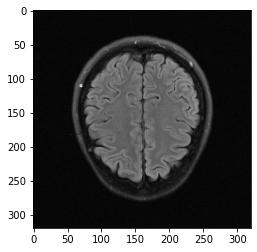

In [80]:
print(hf.keys())
ground_truth = hf['reconstruction_rss'][()]
print(ground_truth.shape)
print(ground_truth.dtype)
plt.imshow(np.abs(ground_truth[7]), cmap='gray')

In [155]:
# before computing metrics => need to both be 320x320 to compare to GT + normalize/AV

import fastmri
from fastmri.data import transforms as T

os.environ["OMP_NUM_THREADS"] = "1"

def preprocess_mri(image, clamp_range=(-6, 6), eps=1e-11):
    """
    Applies AV (absolute value for complex images) and normalizes an MRI image.
    
    Args:
        image (numpy.ndarray or tensor): Input image, possibly complex.
        clamp_range (tuple): Range for clamping values after normalization.
        eps (float): Small epsilon to prevent division by zero in normalization.
    
    Returns:
        (torch.Tensor: Processed image.)
        numpy.ndarray: processed image
    """
    # Convert to tensor if it's a numpy array
    if isinstance(image, np.ndarray):
        image = T.to_tensor(image)

    crop_size = (320, 320)
    # center crop
    image = T.complex_center_crop(image, crop_size)

    # Take absolute value (AV)
    image = fastmri.complex_abs(image)
    
    # Normalize
    image, _, _ = T.normalize_instance(image, eps=eps)
    image = image.clamp(*clamp_range)
    return image.numpy()  #return numpy array instead of tensor


recon_batch_processed = np.zeros((kspace.shape[0], 320, 320))
recon_slice_processed = np.zeros((kspace.shape[0], 320, 320))
recon_middle_S_processed = np.zeros((kspace.shape[0], 320, 320))

for i in range(recon_batch.shape[0]):
    recon_batch_processed[i] = preprocess_mri(recon_batch[i])
    recon_slice_processed[i] = preprocess_mri(recon_slice[i])
    recon_middle_S_processed[i] = preprocess_mri(recon_middle_S[i])


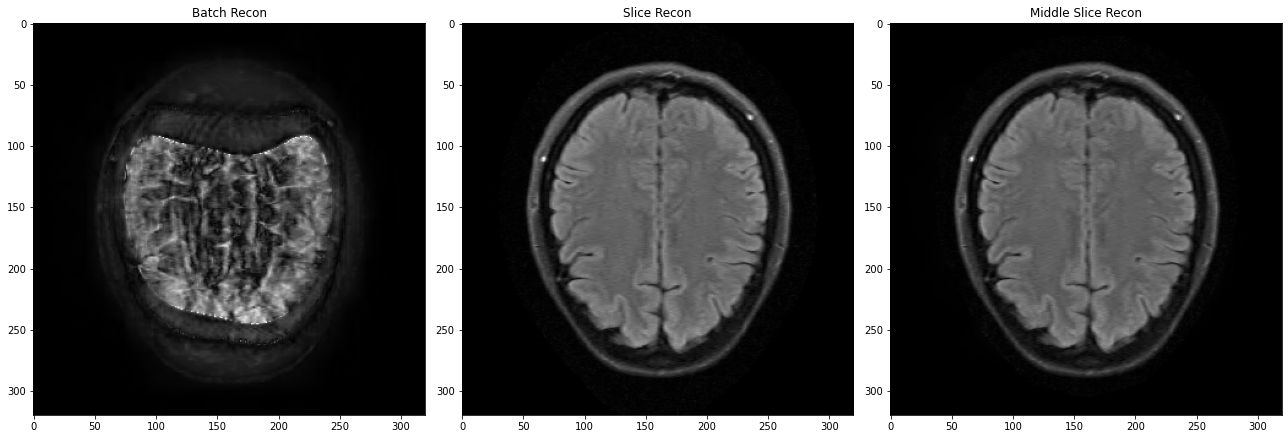

In [157]:
number_slice = 5
# Plot all three methods for comparison
fig, axs = plt.subplots(1, 3, figsize=(18, 6))
titles = ["Batch Recon", "Slice Recon", "Middle Slice Recon"]

axs[0].imshow(recon_batch_processed[number_slice], cmap='gray')
axs[0].set_title(titles[0])

axs[1].imshow(recon_slice_processed[number_slice], cmap='gray')
axs[1].set_title(titles[1])

axs[2].imshow(recon_middle_S_processed[number_slice], cmap='gray')
axs[2].set_title(titles[2])
plt.tight_layout()
plt.show()

In [164]:
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import numpy as np

def compute_psnr(img1, img2):
    """Computes the PSNR between two images."""
    return psnr(img1, img2, data_range=img1.max())

def compute_ssim(img1, img2):
    """Computes the SSIM between two images."""
    return ssim(img1, img2, data_range=img1.max())

# Assuming you have:
# cs_data_batch: batch reconstruction (slices, rows, cols)
# cs_data_single: single-slice reconstruction for each slice (slices, rows, cols)
# ground_truth: the ground truth for comparison (slices, rows, cols)


# Initialize lists to store PSNR and SSIM values
psnr_batch = []
ssim_batch = []
psnr_single = []
ssim_single = []
psnr_middle = []
ssim_middle = []

ground_truth = recon_slice_processed

# Iterate over each slice
for slice_idx in range(recon_batch.shape[0]):
    # Compare PSNR and SSIM for batch reconstruction
    psnr_batch.append(compute_psnr(ground_truth[slice_idx], (recon_batch_processed[slice_idx])))
    ssim_batch.append(compute_ssim(ground_truth[slice_idx], (recon_batch_processed[slice_idx])))

    # Compare PSNR and SSIM for single-slice reconstruction (assuming each slice in cs_data_single is reconstructed individually)
    psnr_single.append(compute_psnr(ground_truth[slice_idx], (recon_slice_processed[slice_idx])))
    ssim_single.append(compute_ssim(ground_truth[slice_idx], (recon_slice_processed[slice_idx])))

    # Compare PSNR and SSIM for middle-slice reconstruction
    psnr_middle.append(compute_psnr(ground_truth[slice_idx], (recon_middle_S_processed[slice_idx])))
    ssim_middle.append(compute_ssim(ground_truth[slice_idx], (recon_middle_S_processed[slice_idx])))

# Convert to numpy arrays for easier analysis
psnr_batch = np.array(psnr_batch)
ssim_batch = np.array(ssim_batch)
psnr_single = np.array(psnr_single)
ssim_single = np.array(ssim_single)
psnr_middle = np.array(psnr_middle)
ssim_middle = np.array(ssim_middle)

# Print results
print(f"PSNR (Batch): Mean = {psnr_batch.mean():.2f}, Std = {psnr_batch.std():.2f}")
print(f"SSIM (Batch): Mean = {ssim_batch.mean():.2f}, Std = {ssim_batch.std():.2f}")
print(f"PSNR (Single): Mean = {psnr_single.mean():.2f}, Std = {psnr_single.std():.2f}")
print(f"SSIM (Single): Mean = {ssim_single.mean():.2f}, Std = {ssim_single.std():.2f}")
print(f"PSNR (Middle): Mean = {psnr_middle.mean():.2f}, Std = {psnr_middle.std():.2f}")
print(f"SSIM (Middle): Mean = {ssim_middle.mean():.2f}, Std = {ssim_middle.std():.2f}")

PSNR (Batch): Mean = 15.29, Std = 2.19
SSIM (Batch): Mean = 0.49, Std = 0.07
PSNR (Single): Mean = inf, Std = nan
SSIM (Single): Mean = 1.00, Std = 0.00
PSNR (Middle): Mean = inf, Std = nan
SSIM (Middle): Mean = 0.92, Std = 0.08


In [ ]:
print(psnr_middle)
print(ssim_middle)
# YOU CLEARLY SEE, THE FURTHER FROM THE MIDDLE SLICE => THE WORSE THE RECONSTRUCTION

[31.05930986 32.7303191  35.35297759 36.15683038 39.33006877 40.64432528
 44.47580444 45.87799534         inf 44.82147578 39.13062032 36.9517287
 35.06291158 31.57703584 30.16786987 30.82188077]
[0.91190829 0.92483024 0.94517643 0.9514082  0.96935444 0.97307907
 0.98471245 0.98761026 1.         0.98595079 0.96185534 0.94121928
 0.90738501 0.83383558 0.75876456 0.72991742]


In [78]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity
from typing import Optional

def psnr(
    gt: np.ndarray, pred: np.ndarray, maxval: Optional[float] = None
) -> np.ndarray:
    """Compute Peak Signal to Noise Ratio metric (PSNR)"""
    if maxval is None:
        maxval = gt.max()
    return peak_signal_noise_ratio(gt, pred, data_range=maxval)


def ssim(
    gt: np.ndarray, pred: np.ndarray, maxval: Optional[float] = None
) -> np.ndarray:
    """Compute Structural Similarity Index Metric (SSIM)"""
    if not gt.ndim == 3:
        raise ValueError("Unexpected number of dimensions in ground truth.")
    if not gt.ndim == pred.ndim:
        raise ValueError("Ground truth dimensions does not match pred.")

    maxval = gt.max() if maxval is None else maxval

    ssim = np.array([0])
    for slice_num in range(gt.shape[0]):
        ssim = ssim + structural_similarity(
            gt[slice_num], pred[slice_num], data_range=maxval
        )

    return ssim / gt.shape[0]

# Compute PSNR and SSIM for each method
psnr_batch = psnr(ground_truth, recon_batch_cropped)
psnr_slice = psnr(ground_truth, recon_slice_cropped)
psnr_middle = psnr(ground_truth, recon_middle_S_cropped)
ssim_batch = ssim(ground_truth, recon_batch_cropped)
ssim_slice = ssim(ground_truth, recon_slice_cropped)
ssim_middle = ssim(ground_truth, recon_middle_S_cropped)

# Print results
print(f"PSNR (Batch): {psnr_batch:.2f}")
print(f"PSNR (Single): {psnr_slice:.2f}")
print(f"PSNR (Middle): {psnr_middle:.2f}")
print(f"SSIM (Middle)", ssim_batch)
print(f"SSIM (Middle)", ssim_slice)
print(f"SSIM (Middle)", ssim_middle)


/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/conda/envs/DL_MRI_reconstruction_baselines_2/lib/python3.6/site-packages/numpy/core/_methods.py:160: ComplexWarning: Casting complex values to real discards the imaginary part
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/conda/envs/DL_MRI_reconstruction_baselines_2/lib/python3.6/site-packages/skimage/metrics/_structural_similarity.py:177: ComplexWarning: Casting complex values to real discards the imaginary part
  im2 = im2.astype(np.float64)


PSNR (Batch): -67.01
PSNR (Single): -67.38
PSNR (Middle): -67.38
SSIM (Middle) [-3.37148718e-07]
SSIM (Middle) [-2.81437486e-06]
SSIM (Middle) [-2.95564303e-07]


## Here, we can test our preprocessing approach for test data

In [33]:
# R = 8
file_name = 'file_brain_AXFLAIR_200_6002441.h5'
preprocessed_train_path = '/DATASERVER/MIC/SHARED/NYU_FastMRI/Preprocessed/multicoil_test'
preprocessed_train_path_full = '/DATASERVER/MIC/SHARED/NYU_FastMRI/Preprocessed/multicoil_test_full'


In [34]:
# First, find out what the value of R is
hf = h5py.File(os.path.join(preprocessed_train_path, file_name), 'r') # Open in read mode!
nPE_mask = hf['mask'][()]
sampled_columns = np.sum(nPE_mask)
R = len(nPE_mask)/sampled_columns
R = float(R)
print(R)


8.0


In [35]:
# Also, use the official test scan ACS region for the sensitivity map estimation
masked_kspace_ACS = hf['kspace'][()]
print("Shape of the raw kspace: ", str(np.shape(masked_kspace_ACS)))
print("Datatype of the raw kspace: ", str(type(masked_kspace_ACS)))


Shape of the raw kspace:  (16, 20, 640, 320)
Datatype of the raw kspace:  <class 'numpy.ndarray'>


In [36]:
# Now, knowing R, create a CS kspace version from the scan's multicoil_test_full file
def closer_to_4_or_8(float):
    diff_4 = np.abs(float - 4)
    diff_8 = np.abs(float - 8)

    if diff_4 < diff_8:
        return int(4)
    elif diff_8 < diff_4:
        return int(8)

hf = h5py.File(os.path.join(preprocessed_train_path_full, file_name), 'r') # Open in read mode!
kspace = hf['kspace'][()]
mask = generate_array(kspace.shape, closer_to_4_or_8(R), mat_file, tensor_out=False)
masked_kspace = kspace * mask + 0.0


In [ ]:
# Now, let's preform a slice-wise ESPIRiT and CS estimation
cs_data = np.zeros((masked_kspace.shape[0], masked_kspace.shape[2], masked_kspace.shape[3]), dtype=np.complex64)

for slice in range(masked_kspace.shape[0]):
    S = estimate_sensitivity_maps(masked_kspace_ACS[slice,:,:,:])
    cs_data[slice,:,:] = CS(masked_kspace[slice,:,:,:], S)

print("Shape of the numpy-converted CS data: ", str(cs_data.shape))
print("Type of the numpy-converted CS data: ", str(type(cs_data)))


Shape of the numpy-converted CS data:  (16, 640, 320)
Type of the numpy-converted CS data:  <class 'numpy.ndarray'>


: 

: 

: 

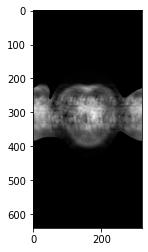

: 

: 

: 

In [ ]:
plt.imshow(np.abs(cs_data[10,:,:]), cmap='gray')


In [ ]:
# Write cs_data away
hf = h5py.File(os.path.join(preprocessed_train_path, file_name), 'a') # Open in append mode!
# ...


OSError: Unable to create file (unable to open file: name = '/DATASERVER/MIC/SHARED/NYU_FastMRI/Preprocessed/multicoil_test/file_brain_AXFLAIR_200_6002441.h5', errno = 17, error message = 'File exists', flags = 15, o_flags = c2)

: 

: 

: 

In [ ]:
# R = 4
file_name = 'file_brain_AXFLAIR_209_6001340.h5'

: 

: 

: 

In [ ]:
# First, find out what the value of R is
hf = h5py.File(os.path.join(preprocessed_train_path, file_name), 'r') # Open in read mode!
nPE_mask = hf['mask'][()]
sampled_columns = np.sum(nPE_mask)
R = len(nPE_mask)/sampled_columns
R = float(R)
print(R)


4.0


: 

: 

: 

In [ ]:
# Also, use the official test scan ACS region for the sensitivity map estimation
masked_kspace_ACS = hf['kspace'][()]
print("Shape of the raw kspace: ", str(np.shape(masked_kspace_ACS)))
print("Datatype of the raw kspace: ", str(type(masked_kspace_ACS)))


Shape of the raw kspace:  (16, 14, 640, 320)
Datatype of the raw kspace:  <class 'numpy.ndarray'>


: 

: 

: 

In [ ]:
# Now, knowing R, create a CS kspace version from the scan's multicoil_test_full file
def closer_to_4_or_8(float):
    diff_4 = np.abs(float - 4)
    diff_8 = np.abs(float - 8)

    if diff_4 < diff_8:
        return int(4)
    elif diff_8 < diff_4:
        return int(8)

hf = h5py.File(os.path.join(preprocessed_train_path_full, file_name), 'r') # Open in read mode!
kspace = hf['kspace'][()]
mask = generate_array(kspace.shape, closer_to_4_or_8(R), mat_file, tensor_out=False)
masked_kspace = kspace * mask + 0.0


: 

: 

: 

In [ ]:
# Now, let's preform a slice-wise ESPIRiT and CS estimation
cs_data = np.zeros((masked_kspace.shape[0], masked_kspace.shape[2], masked_kspace.shape[3]), dtype=np.complex64)

for slice in range(masked_kspace.shape[0]):
    S = estimate_sensitivity_maps(masked_kspace_ACS[slice,:,:,:])
    cs_data[slice,:,:] = CS(masked_kspace[slice,:,:,:], S)

print("Shape of the numpy-converted CS data: ", str(cs_data.shape))
print("Type of the numpy-converted CS data: ", str(type(cs_data)))


Shape of the numpy-converted CS data:  (16, 640, 320)
Type of the numpy-converted CS data:  <class 'numpy.ndarray'>


: 

: 

: 

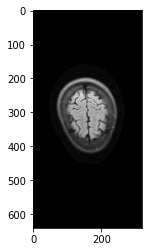

: 

: 

: 

In [ ]:
plt.imshow(np.abs(cs_data[10,:,:]), cmap='gray')


Here, we can test a loop which loops through the files in the folders we specify

In [ ]:
from pathlib import Path

folder_path = '/DATASERVER/MIC/SHARED/NYU_FastMRI/Preprocessed/multicoil_test/'
files = Path(folder_path).glob('**/*')
for file in files:
    print(file)


/usr/local/micapollo01/MIC/DATA/SHARED/NYU_FastMRI/Preprocessed/multicoil_test/file_brain_AXT1POST_203_6000790.h5
/usr/local/micapollo01/MIC/DATA/SHARED/NYU_FastMRI/Preprocessed/multicoil_test/file_brain_AXT2_209_2090032.h5
/usr/local/micapollo01/MIC/DATA/SHARED/NYU_FastMRI/Preprocessed/multicoil_test/file_brain_AXT2_205_6000143.h5
/usr/local/micapollo01/MIC/DATA/SHARED/NYU_FastMRI/Preprocessed/multicoil_test/file_brain_AXFLAIR_202_6000578.h5
/usr/local/micapollo01/MIC/DATA/SHARED/NYU_FastMRI/Preprocessed/multicoil_test/file_brain_AXT2_200_6002431.h5
/usr/local/micapollo01/MIC/DATA/SHARED/NYU_FastMRI/Preprocessed/multicoil_test/file_brain_AXT2_209_2090309.h5
/usr/local/micapollo01/MIC/DATA/SHARED/NYU_FastMRI/Preprocessed/multicoil_test/file_brain_AXFLAIR_209_6001383.h5
/usr/local/micapollo01/MIC/DATA/SHARED/NYU_FastMRI/Preprocessed/multicoil_test/file_brain_AXT2_202_2020417.h5
/usr/local/micapollo01/MIC/DATA/SHARED/NYU_FastMRI/Preprocessed/multicoil_test/file_brain_AXFLAIR_201_6002955.

: 

: 

: 

In [ ]:
from pathlib import Path

folder_path = '/DATASERVER/MIC/SHARED/NYU_FastMRI/Preprocessed/multicoil_test/'
files = Path(folder_path).glob('**/*')
for file in files:
    print(file.name)
    print('/folder/path/'+file.name)


file_brain_AXT1POST_203_6000790.h5
/folder/path/file_brain_AXT1POST_203_6000790.h5
file_brain_AXT2_209_2090032.h5
/folder/path/file_brain_AXT2_209_2090032.h5
file_brain_AXT2_205_6000143.h5
/folder/path/file_brain_AXT2_205_6000143.h5
file_brain_AXFLAIR_202_6000578.h5
/folder/path/file_brain_AXFLAIR_202_6000578.h5
file_brain_AXT2_200_6002431.h5
/folder/path/file_brain_AXT2_200_6002431.h5
file_brain_AXT2_209_2090309.h5
/folder/path/file_brain_AXT2_209_2090309.h5
file_brain_AXFLAIR_209_6001383.h5
/folder/path/file_brain_AXFLAIR_209_6001383.h5
file_brain_AXT2_202_2020417.h5
/folder/path/file_brain_AXT2_202_2020417.h5
file_brain_AXFLAIR_201_6002955.h5
/folder/path/file_brain_AXFLAIR_201_6002955.h5
file_brain_AXT2_208_2080716.h5
/folder/path/file_brain_AXT2_208_2080716.h5
file_brain_AXT2_200_2000498.h5
/folder/path/file_brain_AXT2_200_2000498.h5
file_brain_AXFLAIR_201_6003013.h5
/folder/path/file_brain_AXFLAIR_201_6003013.h5
file_brain_AXT2_203_2030129.h5
/folder/path/file_brain_AXT2_203_2030

: 

: 

: 

## Transforms.py TESTS

In [ ]:
import os
from fastmri.data import transforms as T
import fastmri

## GIVEN
path_h5file = "/DATASERVER/MIC/SHARED/NYU_FastMRI/Knee/multicoil_train/file1000974.h5"
h5file = h5py.File(path_h5file, 'r')
attrs = h5file.attrs
fname = "file1000974.h5"
bart_path = "/DATASERVER/MIC/GENERAL/STUDENTS/aslock2/CS_Output/knee_train/"
slice_num = 30  
    ## TARGET:
# fetched in mri_data.py as: (but self.recons_key is defined above as "reconstruction_rss")
#target = h5file[self.recons_key][slice_num] if "recons_key" in hf else None
target = h5file["reconstruction_rss"][slice_num]

##  INSIDE UNETDATATRANSFORM
fname_base = fname.replace(".h5", "")
bart_fname = f"{fname_base}_cs.npy"
bart_full_path = os.path.join(bart_path, bart_fname)
bart_image = np.load(bart_full_path)
image = T.to_tensor(bart_image[slice_num, ...])

# check for max value
max_value = attrs["max"] if "max" in attrs.keys() else 0.0

# absolute value
image = fastmri.complex_abs(image)

# normalize input
image, mean, std = T.normalize_instance(image, eps=1e-11)
image = image.clamp(-6, 6)

# normalize target ## PROBLEM: need new target
if target is not None:
    target_torch = to_tensor(target)
    target_torch = center_crop(target_torch, crop_size)
    target_torch = normalize(target_torch, mean, std, eps=1e-11)
    target_torch = target_torch.clamp(-6, 6)
else:
    target_torch = torch.Tensor([0])


In [54]:
print("keys in h5file: ", str(h5file.keys()))

keys in h5file:  <KeysViewHDF5 ['ismrmrd_header', 'kspace', 'reconstruction_rss']>


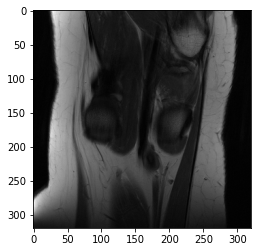

In [52]:
plt.imshow(target, cmap='gray')

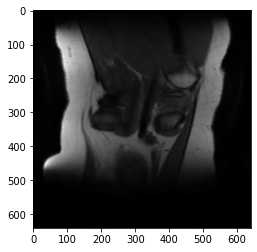

In [53]:
plt.imshow(image.numpy(), cmap='gray')
# check for max value